<a href="https://colab.research.google.com/github/PeteJoh/FPL-Optimization-Tools/blob/main/FPL_game_predictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install highlight_text

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import urllib
from urllib.error import HTTPError
import os
from PIL import Image
import matplotlib.ticker as ticker
import matplotlib.patheffects as path_effects
import matplotlib.font_manager as fm
from highlight_text import fig_text, ax_text
#from adjustText import adjust_text
from matplotlib.colors import LinearSegmentedColormap, Normalize
from matplotlib import cm
import matplotlib.pyplot as plt

In [44]:

font_path = "/content/gdrive/MyDrive/fonts/static"

# Check if font_path is a directory before iterating
if os.path.isdir(font_path):
    for x in os.listdir(font_path):
        # Construct the full path to the font file or subdirectory
        font_or_subdir_path = os.path.join(font_path, x)

        # Check if it's a file and has a .ttf extension
        if os.path.isfile(font_or_subdir_path) and x.lower().endswith(".ttf"):
            fm.fontManager.addfont(font_or_subdir_path)
            try:
                # Extract font properties (weight, family name) from the file name
                font_properties = x.split("-")
                weight = font_properties[-1].split(".")[0].lower()
                family_name = font_properties[0]
                fm.FontProperties(weight=weight, fname=family_name)
            except Exception:
                continue
else:
    print(f"Error: '{font_path}' is not a valid directory.")

plt.rcParams['font.family'] = 'Karla'

In [27]:
font_path = "/content/gdrive/MyDrive/fonts/static"
for x in os.listdir(font_path):
    for y in os.listdir(f"{font_path}/{x}"):
        if y.split(".")[-1] == "ttf":
            fm.fontManager.addfont(f"{font_path}/{x}/{y}")
            try:
                fm.FontProperties(weight=y.split("-")[-1].split(".")[0].lower(), fname=y.split("-")[0])
            except Exception:
                continue

#plt.style.use("../assets/stylesheets/soc_base.mplstyle")
plt.rcParams['font.family'] = 'Karla'

NotADirectoryError: [Errno 20] Not a directory: '/content/gdrive/MyDrive/fonts/static/DMSans_18pt-ThinItalic.ttf'

In [45]:
player_images={
                #Forwards
               "Erling Haaland":"737066.png",
               "Harry Kane":"194165.png",
               "Aleksandar Mitrović":"351860.png",
               "Gabriel Fernando de Jesus":"576165.png",
               "Ivan Toney":"408987.png",
               "Dominic Solanke":"591734.png",
               "Ollie Watkins":"540088.png",
               "Callum Wilson":"184321.png",
               "Julián Álvarez":"974753.png",
               "Darwin Núñez Ribeiro":"950561.png",
               "Alexander Isak":"690107.png",
               "Cody Gakpo":"806552.png",
               "Taiwo Awoniyi":"643717.png",
               "Odsonne Edouard":"637746.png",
               "Neal Maupay":"391064.png",
               "Yoane Wissa":"666857.png",
               "Eddie Nketiah":"860920.png",
               "Nicolas Jackson":"1197347.png",
               "Carlton Morris":"562725.png",
               "Matheus Santos Carneiro Da Cunha":"863098.png",
               "Fábio Silva":"1050158.png",
               "Michail Antonio":"158545.png",
                "Jhon Durán":"1088066.png",
                "Bénie Traoré":"1231770.png",
                "Callum Wilson":"184321.png",


               #Midfielders
               "Mohamed Salah":"292462.png",
               "Kevin De Bruyne":"169200.png",
               "Bruno Borges Fernandes":"422685.png",
               "Bukayo Saka":"961995.png",
               "Martin Ødegaard":"534670.png",
               "Gabriel Martinelli Silva":"1021586.png",
               "Solly March":"416850.png",
               "Pascal Groß":"167008.png",
               "Phil Foden":"815006.png",
               "Kaoru Mitoma":"862608.png",
               "Eberechi Eze":"818975.png",
               "Jarrod Bowen":"523825.png",
               "Son Heung-min":"212867.png",
               "Marcus Rashford":"696365.png",
               "Kai Havertz":"749736.png",
               "Jordan Ayew":"154280.png",
               "Declan Rice":"654096.png",
               "Raheem Sterling":"246575.png",
               "Bryan Mbeumo":"923312.png",
               "Moisés Caicedo Corozo":"1137668.png",
               "Carney Chukwuemeka":"1089685.png",
               "Mykhailo Mudryk":"976506.png",
               "Enzo Fernández":"1137705.png",
               "Richarlison de Andrade":"654908.png",
               "Pape Matar Sarr":"1107280.png",
               "Dejan Kulusevski":"935379.png",
               "James Maddison":"493165.png",
               "Bobby De Cordova-Reid":"262550.png",
               "Harry Wilson":"494417.png",
               "Leandro Trossard":"318615.png",
               "Mathias Jensen":"650616.png",
                "Jack Harrison":"751649.png",
                "Hwang Hee-chan":"620026.png",
                "Pedro Lomba Neto":"843040.png",
                "Abdoulaye Doucouré":"352887.png",
                "Alex Iwobi":"604785.png",
                "Jadon Sancho":"846381.png",
                "Alejandro Garnacho":"1203665.png",
                "Morgan Gibbs-White":"789502.png",
                "Mason Mount":"750032.png",
                "Carlos Henrique Casimiro":"208494.png",
                "Antony Matheus dos Santos":"967622.png",
                "Solly March":"416850.png",
                "Julio Enciso":"1073742.png",
                "James Ward-Prowse":"279490.png",
                "Lucas Tolentino Coelho de Lima":"766435.png",
                "Simon Adingra":"1227012.png",
                "Saïd Benrahma":"491883.png",
                "Moussa Diaby":"923498.png",
                "Leon Bailey":"671331.png",
                "John McGinn":"356406.png",
                "Douglas Luiz Soares de Paulo":"787350.png",
                "Mateo Kovačić":"239219.png",
                "Bernardo Veiga de Carvalho e Silva":"488139.png",
                "Jack Grealish":"312765.png",
                "Rodrigo Hernandez":"675088.png",
                "Conor Gallagher":"96027.png",
                "Anthony Gordon":"906937.png",
                "Dominik Szoboszlai":"846005.png",
                "Miguel Almirón Rejala":"442277.png",
                "Harvey Barnes":"760359.png",
                "Luis Díaz":"860914.png",
                "Diogo Teixeira da Silva":"570461.png",


               #Defenders
               "William Saliba":"955406.png",
               "Takehiro Tomiyasu":"664444.png",
               "Kieran Trippier":"191869.png",
               "Rúben Gato Alves Dias":"614006.png",
               "João Cancelo":"361757.png",
               "Joël Veltman":"304455.png",
               "Adam Webster":"303346.png",
               "John Stones":"263653.png",
               "Lewis Dunk":"201690.png",
               "Reece James":"807729.png",
               "Pervis Estupiñán":"688278.png",
               "Manuel Akanji":"521318.png",
               "Andrew Robertson":"357880.png",
               "Ben Chilwell":"672469.png",
               "Axel Disasi":"696646.png",
               "Aaron Wan-Bissaka":"760320.png",
               "Virgil van Dijk":"209405.png",
               "Willy Boly":"246331.png",
               "Luke Shaw":"362694.png",
               "Trent Alexander-Arnold":"760712.png",
               "Raphaël Varane":"230982.png",
               "Benjamin White":"776151.png",
               "Kyle Walker":"159833.png",
               "Lucas Digne":"210111.png",
               "Joško Gvardiol":"1070712.png",
               "Matty Cash":"729731.png",
               "Nathan Aké":"417068.png",
               "Ryan Giles":"933635.png",
               "Malo Gusto":"1197250.png",
               "Levi Colwill":"1096400.png",
               "Thiago Emiliano da Silva":"80562.png",
               "Ben Davies":"276121.png",
               "Emerson Leite de Souza Junior":"797908.png",
               "Destiny Udogie":"9cac7bea.png",
               "Pedro Porro":"941573.png",
               "Cristian Romero":"789066.png",
               "Micky van de Ven":"1097466.png",
               "Ivan Perišić":"163670.png",
               "Gabriel dos Santos Magalhães":"795179.png",
               "Joel Ward":"146830.png",
               "Marc Guéhi":"844425.png",
               "Nathan Collins":"961306.png",
               "Aaron Hickey":"1002039.png",
               "Kristoffer Ajer":"552718.png",
               "Ethan Pinnock":"711357.png",
               "Rico Henry":"562892.png",
                "Nélson Cabral Semedo":"470834.png",
                "Nathan Patterson":"1112684.png",
                "Craig Dawson":"169162.png",
                "Michael Keane":"290410.png",
                "James Tarkowski":"243138.png",
                "Ashley Young":"23354.png",
                "Aaron Wan-Bissaka":"760320.png",
                "Lisandro Martínez":"847983.png",
                "Lewis Dunk":"201690.png",
                "Adam Webster":"303346.png",
                "Lucas Digne":"210111.png",
                "Ezri Konsa Ngoyo":"710159.png",
                "Diego Carlos Santos Silva":"570434.png",
                "Pau Torres":"792645.png",
                "Jordan Beyer":"861447.png",
                "Ameen Al-Dakhil":"1279764.png",
                "Kieran Trippier":"191869.png",



                #Goalkeepers
               "David Raya Martin":"562727.png",
               "Alisson Ramses Becker":"319784.png",
               "Bernd Leno":"215168.png",
               "Nick Pope":"280484.png",
               "Aaron Ramsdale":"746395.png",
               "Vicente Guaita":"109222.png",
               "Ederson Santana de Moraes":"363364.png",
               "Emiliano Martínez Romero":"268375.png",
               "Wes Foderingham":"212944.png",
               "Matt Turner":"729988.png",
               "Mark Flekken":"330643.png",
               "André Onana":"611491.png",
               "Sam Johnstone":"280287.png",
              "James Trafford":"1187213.png",
               "Thomas Kaminski":"131408.png",
               "Robert Sánchez":"789571.png",
               "Norberto Murara Neto":"176186.png",
               "Guglielmo Vicario":"538501.png",
                "Jordan Pickford":"303919.png",
                "José Malheiro de Sá":"416175.png",
                "Jason Steele":"107917.png",
                "Alphonse Areola":"210164.png",

               }

In [46]:
club_colors={"Arsenal":"#fadcdd",
             "Crystal Palace":"#bac9e3",
             "Chelsea":"#dce7f5",
             "Luton":"#f0cb89",
             "Spurs":"#c1c1c7",
             "Bournemouth":"#f7f0f0",
             "Fulham":"#cccaca",
             "Brentford":"#f2ebeb",
             "Wolves":"#f7f4eb",
             "Everton":"#b0b1b5",
             "Man Utd":"#bf9d9b",
             "Nott'm Forest":"#ccc4c4",
             "Brighton":"#bacadb",
             "West Ham":"#e3dcde",
             "Burnley":"#d1cdcf",
            "Aston Villa":"#e3dcdf",
             "Sheffield Utd":"#e3ccce",
            "Man City":"#dceff5",
             "Liverpool":"#b87d86",
            "Newcastle":"#e0dedf"
             }
club_texts={"Arsenal":"#e60b11",
             "Crystal Palace":"#1b458f",
            "Luton":"#ffa500",
            "Chelsea":"#034694",
             "Spurs":"#000080",
             "Bournemouth":"#c91318",
            "Fulham":"#421313",
            "Brentford":"#e30613",
            "Wolves":"#fdb913",
             "Everton":"#003399",
             "Man Utd":"#da291c",
             "Nott'm Forest":"#dd0000",
             "Brighton":"#0057b8",
             "West Ham":"#7a263a",
            "Burnley":"#6c1d45",
            "Aston Villa":"#670e36",
            "Sheffield Utd":"#ee2737",
            "Man City":"#6CABDD",
            "Liverpool":"#c8102e",
            "Newcastle":"#241f20"}
club_logos={"Man City":"https://images.fotmob.com/image_resources/logo/teamlogo/8456.png",
            "Arsenal":"https://images.fotmob.com/image_resources/logo/teamlogo/9825.png",
            "Brighton":"https://images.fotmob.com/image_resources/logo/teamlogo/10204.png",
            "Brentford":"https://images.fotmob.com/image_resources/logo/teamlogo/9937.png",
            "Aston Villa":"https://images.fotmob.com/image_resources/logo/teamlogo/10252.png",
            "Newcastle":"https://images.fotmob.com/image_resources/logo/teamlogo/10261.png",
            "Bournemouth":"https://images.fotmob.com/image_resources/logo/teamlogo/8678.png",
            "Nott'm Forest":"https://images.fotmob.com/image_resources/logo/teamlogo/10203.png",
            "Wolves":"https://images.fotmob.com/image_resources/logo/teamlogo/8602.png",
            "Spurs":"https://images.fotmob.com/image_resources/logo/teamlogo/8586.png",
            "Chelsea":"https://images.fotmob.com/image_resources/logo/teamlogo/8455.png",
            "Liverpool":"https://images.fotmob.com/image_resources/logo/teamlogo/8650.png",
            "Man Utd":"https://images.fotmob.com/image_resources/logo/teamlogo/10260.png",
            "Crystal Palace":"https://images.fotmob.com/image_resources/logo/teamlogo/9826.png",
            "Luton":"https://images.fotmob.com/image_resources/logo/teamlogo/8346.png",
            "Burnley":"https://images.fotmob.com/image_resources/logo/teamlogo/8191.png",
            "Fulham":"https://images.fotmob.com/image_resources/logo/teamlogo/9879.png",
            "Everton":"https://images.fotmob.com/image_resources/logo/teamlogo/8668.png",
            "West Ham":"https://images.fotmob.com/image_resources/logo/teamlogo/8654.png",
            "Sheffield Utd":"https://images.fotmob.com/image_resources/logo/teamlogo/8657.png"}

In [47]:
gameweek=10

In [48]:
df_gk=pd.read_csv("/content/gdrive/MyDrive/fplpredict/predicted_dataset/GW10/goalkeepers_points.csv")
df_fwd=pd.read_csv("/content/gdrive/MyDrive/fplpredict/predicted_dataset/GW10/forwards_points.csv")
df_md=pd.read_csv("/content/gdrive/MyDrive/fplpredict/predicted_dataset/GW10/midfielders_points.csv")
df_def=pd.read_csv("/content/gdrive/MyDrive/fplpredict/predicted_dataset/GW10/defenders_points.csv")

In [49]:
unavailable=["Ivan Toney","João Cancelo","Kevin De Bruyne","Reece James"]

In [50]:
df_gk["position"]="GKP"
df_fwd["position"]="FWD"
df_md["position"]="MID"
df_def["position"]="DEF"

In [51]:
df=pd.concat([df_fwd,df_md,df_def,df_gk])
df=df[~df["name"].isin(unavailable)]

In [52]:
df["team"].value_counts()

team
Brighton          45
Chelsea           39
Wolves            39
Southampton       37
Aston Villa       37
Spurs             36
Newcastle         33
Ipswich           33
Nott'm Forest     33
Leicester         33
Arsenal           33
Crystal Palace    33
Man Utd           32
Brentford         32
Liverpool         31
Bournemouth       30
Everton           29
Fulham            29
West Ham          27
Man City          26
Name: count, dtype: int64

In [53]:
def clean_name(name):
  name=" ".join(name.split(" ")[:2])
  return name

In [ ]:
#df=df[["name","position","value","points","team"]]#.tail(15)

In [54]:
df["points"]=df["points"].round(3)
df["value"]=(df["value"]/10).round(1)
#df["name"]=df["name"].apply(clean_name)

In [55]:
df

index                     name  \
0            Erling Haaland2024-11-02T15:00:00Z           Erling Haaland   
1            Julián Álvarez2024-11-02T15:00:00Z           Julián Álvarez   
2   Romelu Lukaku Bolingoli2024-11-03T16:30:00Z  Romelu Lukaku Bolingoli   
3        David Datro Fofana2024-11-03T16:30:00Z       David Datro Fofana   
4           Nicolas Jackson2024-11-03T16:30:00Z          Nicolas Jackson   
..                                          ...                      ...   
67            Alex McCarthy2024-11-02T15:00:00Z            Alex McCarthy   
68           Dean Henderson2024-11-02T17:30:00Z           Dean Henderson   
69            Remi Matthews2024-11-02T17:30:00Z            Remi Matthews   
70              Mateusz Lis2024-11-02T15:00:00Z              Mateusz Lis   
71             Gavin Bazunu2024-11-02T15:00:00Z             Gavin Bazunu   

              team  points  value position  
0         Man City   5.905   15.4      FWD  
1         Man City   0.235    7.0      FWD  
2          Chelsea   0.116    6.3      FWD  
3          Chelsea   0.084    5.4      FWD  
4          Chelsea   4.014    7.9      FWD  
..             ...     ...    ...      ...  
67     Southampton   0.242    4.4      GKP  
68  Crystal Palace   3.516    4.4      GKP  
69  Crystal Palace   0.022    4.0      GKP  
70     Southampton   0.010    4.0      GKP  
71     Southampton   0.050    4.4      GKP  

[667 rows x 6 columns]

In [56]:
def ax_player(player_url, ax):
    '''
    Plots the picture of a player at a specific axes.
    Args:
        Player_id (int): the id of the player according to Fotmob.
        ax (object): the matplotlib axes where we'll draw the image.
    '''
    player_image= Image.open(urllib.request.urlopen(player_url))
    ax.imshow(player_image)
    ax.axis('off')
    return ax

## Match 1

In [57]:
clubs=["Newcastle","Arsenal"]
df_club=df[df["team"].isin(clubs)].sort_values("points").reset_index()[["name","position","value","points","team"]].tail(15)

In [58]:
df_club

name position  value  points       team
51                       Benjamin White      DEF    6.3   2.232    Arsenal
52         Gabriel dos Santos Magalhães      DEF    6.3   2.299    Arsenal
53                       Alexander Isak      FWD    8.3   2.410  Newcastle
54                           Lewis Hall      DEF    4.3   2.610  Newcastle
55                        Thomas Partey      MID    5.0   2.659    Arsenal
56      Bruno Guimarães Rodriguez Moura      MID    6.2   2.690  Newcastle
57  Joelinton Cássio Apolinário de Lira      MID    6.0   2.767  Newcastle
58                            Nick Pope      GKP    5.0   2.835  Newcastle
59                     Leandro Trossard      MID    6.9   2.840    Arsenal
60                    David Raya Martin      GKP    5.6   2.883    Arsenal
61             Gabriel Martinelli Silva      MID    7.0   3.208    Arsenal
62                       Anthony Gordon      MID    7.2   3.680  Newcastle
63                          Kai Havertz      FWD    8.2   4.156    Arsenal
64                          Declan Rice      MID    6.3   4.459    Arsenal
65                          Bukayo Saka      MID   10.0   5.566    Arsenal

In [ ]:
ncols=df_club.shape[1]
nrows=df_club.shape[0]
color="#f5fffc"

fig = plt.figure(figsize=(7,10), dpi=300,facecolor = color)
ax = plt.subplot(facecolor =color)

ax.set_xlim(0, ncols+1.5)
ax.set_ylim(0, nrows+1)

positions=[0.25,3.5,4.5,5.5,6.5]
columns=df_club.columns

for i in range(nrows):
    for j,col in enumerate(columns):
      if j!=4:
        if j==0:
          ha="left"
          ax.annotate(
                    xy=(positions[j], i+0.5),
                    text=clean_name(df_club[col].iloc[i]),
                    ha=ha,
                    va='center',fontsize=12,fontfamily = "DM Sans",
                )
        elif j==3:
          ha = "center"
          ax.annotate(
                    xy=(positions[j], i+0.5),
                    text=df_club[col].iloc[i],
                    ha=ha,
                    va='center',weight="bold",fontsize=12
                )
        else:
          ha = "center"
          ax.annotate(
                    xy=(positions[j], i+0.5),
                    text=df_club[col].iloc[i],
                    ha=ha,
                    va='center'
                )

for i,team in enumerate(df_club["team"]):
  ax.fill_between(x=[0,2],y1=i+1,y2=i,color=club_colors[team],alpha=0.5,ec='None')







cols=["Player","Position","Value","Predicted\nPoints"]
for j, col in enumerate(cols):
    ha="center"
    if j==0:
        ha="left"
    ax.annotate(
            xy=(positions[j], nrows+0.6),
                text=f"{col}",
                ha=ha,
                va='center', weight="bold" )

ax.set_axis_off()

# Add dividing lines
ax.plot([ax.get_xlim()[0], ax.get_xlim()[1]], [nrows, nrows], lw=1.5, color='black', marker='', zorder=4)
ax.plot([ax.get_xlim()[0], ax.get_xlim()[1]], [0, 0], lw=1.5, color='black', marker='', zorder=4)
for i in range(1,nrows):
    ax.plot([ax.get_xlim()[0], ax.get_xlim()[1]], [i, i], lw=1.5, marker='', zorder=4,color='gray', ls=':')

# -- Transformation functions
DC_to_FC = ax.transData.transform
FC_to_NFC = fig.transFigure.inverted().transform
# -- Take data coordinates and transform them to normalized figure coordinates
DC_to_NFC = lambda x: FC_to_NFC(DC_to_FC(x))
# -- Add nation axes
ax_point_1 = DC_to_NFC([2.25, 0.5])
ax_point_2 = DC_to_NFC([3, 1.25])
ax_width = abs(ax_point_1[0] - ax_point_2[0])
ax_height = abs(ax_point_1[1] - ax_point_2[1])
for x in range(0, nrows):
    ax_coords = DC_to_NFC([2, x + .1])
    flag_ax = fig.add_axes(
        [ax_coords[0], ax_coords[1], ax_width, ax_height]
    )
    #print(df_club["name"])
    name=df_club["name"].iloc[x]
    try:
      player_url=f"https://images.fotmob.com/image_resources/playerimages/{player_images[name]}"
      ax_player(player_url, flag_ax)
    except:
      ax_player("https://www.fotmob.com/_next/static/media/player_fallback.9cac7bea.png", flag_ax)

#header and logo
fig_text(
    x = 0.23, y = 0.93,
    s = f"<{clubs[0]}> vs <{clubs[1]}> | FPL points (GW {gameweek})\n               predictions by <@fpl__ai>",
    color = "black",
    size = 13,
    highlight_textprops = [
        {"weight":"bold","color":f"{club_texts[clubs[0]]}"},
        {"weight":"bold","color":f"{club_texts[clubs[1]]}"},
        {"weight":"bold","family": "DM Sans",},
    ],
    annotationbbox_kw={"xycoords": "figure fraction"}
)


#Get and Open the club logo
club_logo1 = Image.open(urllib.request.urlopen(club_logos[clubs[0]]))
#create new axes at top right corner [left_position,bottom_position,width,hight]
logo_ax = fig.add_axes([0.15, 0.88, 0.06, 0.06])
#paste logo on the axes
logo_ax.imshow(club_logo1)
#switch off  the axis off our AXES
logo_ax.axis("off")

#Get and Open the club logo
club_logo2 = Image.open(urllib.request.urlopen(club_logos[clubs[1]]))
#create new axes at top right corner [left_position,bottom_position,width,hight]
logo_ax = fig.add_axes([0.78, 0.88, 0.06, 0.06])
#paste logo on the axes
logo_ax.imshow(club_logo2)
#switch off  the axis off our AXES
logo_ax.axis("off")

## Match 2

In [20]:
clubs=["Bournemouth","Man City"]
df_club=df[df["team"].isin(clubs)].sort_values("points").reset_index()[["name","position","value","points","team"]].tail(15)

In [21]:
df_club

name position  value  points         team
41                       Ryan Christie      MID    4.9   2.489  Bournemouth
42                      Illia Zabarnyi      DEF    4.4   2.499  Bournemouth
43                     Justin Kluivert      MID    5.3   2.569  Bournemouth
44               Rúben Gato Alves Dias      DEF    5.5   2.572     Man City
45                      Ilkay Gündogan      MID    6.5   2.709     Man City
46                       Mateo Kovačić      MID    5.6   2.766     Man City
47                          Rico Lewis      DEF    4.8   2.851     Man City
48                          Lewis Cook      MID    5.0   2.947  Bournemouth
49                    Marcus Tavernier      MID    5.5   2.973  Bournemouth
50           Ederson Santana de Moraes      GKP    5.5   3.139     Man City
51                     Antoine Semenyo      MID    5.6   3.189  Bournemouth
52                      Joško Gvardiol      DEF    6.2   3.542     Man City
53                          Phil Foden      MID    9.3   3.583     Man City
54  Bernardo Veiga de Carvalho e Silva      MID    6.5   3.670     Man City
55                      Erling Haaland      FWD   15.4   5.905     Man City

KeyError: 'Lewis Hall'

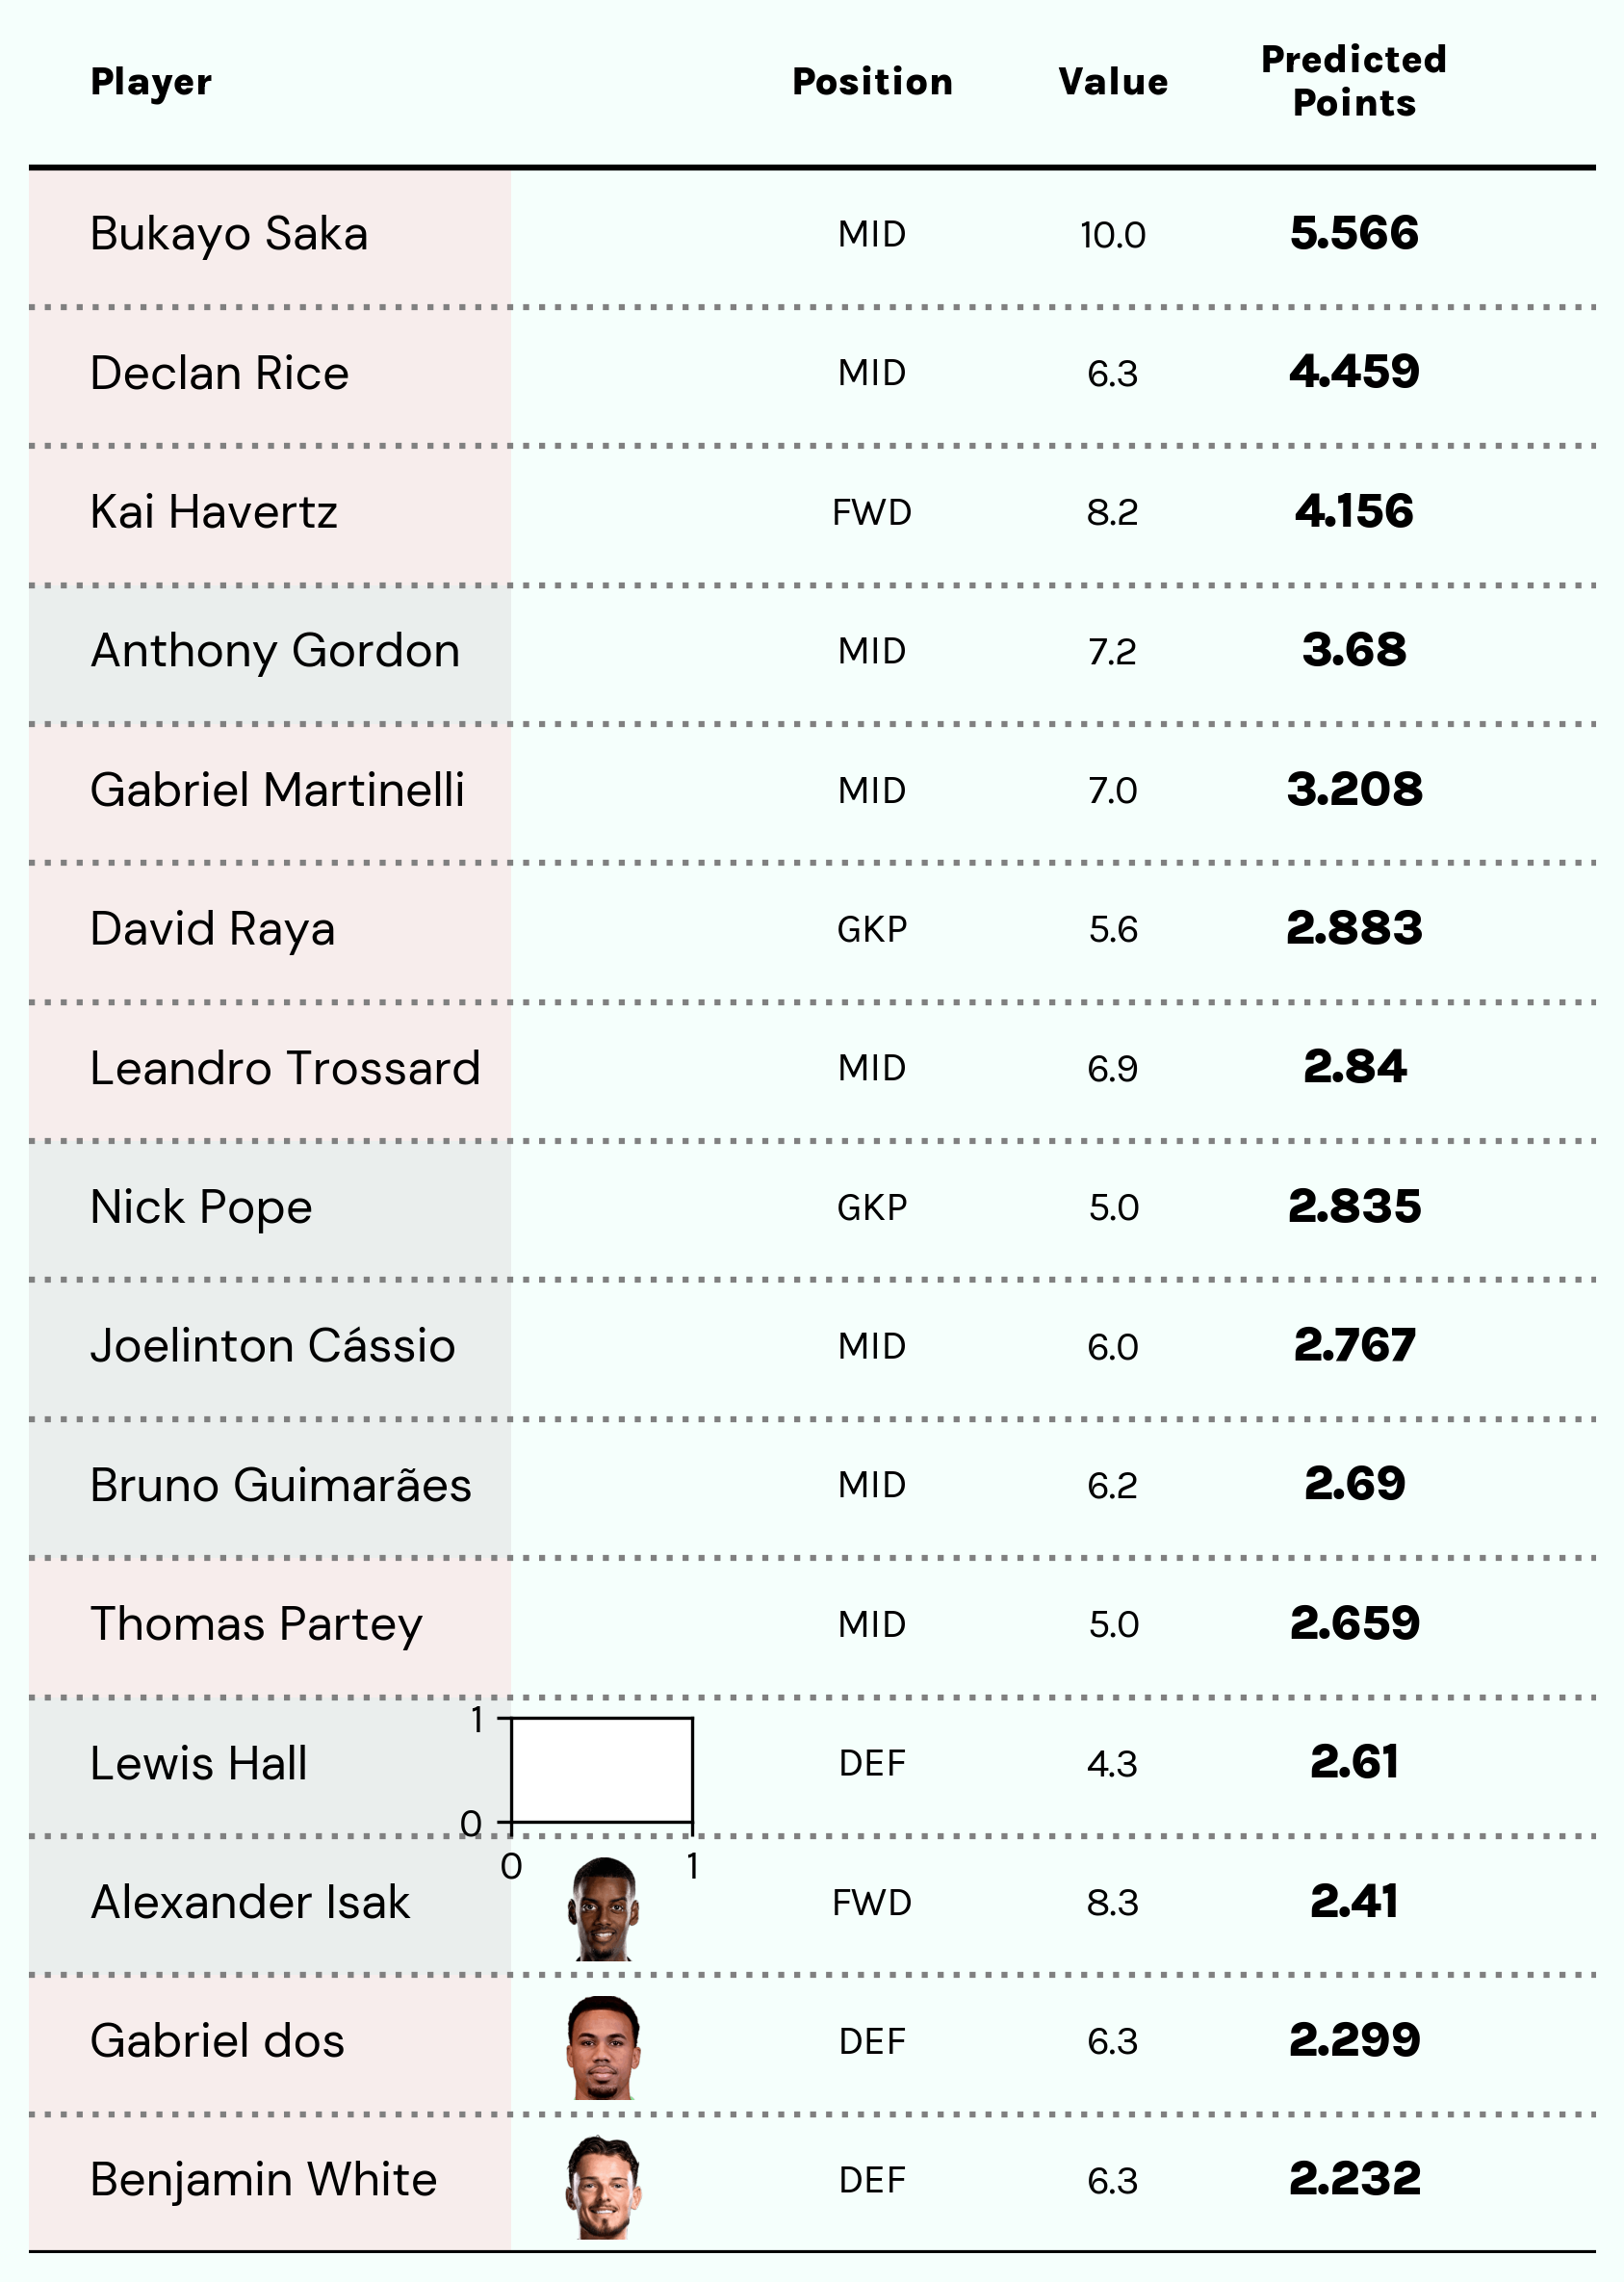

In [60]:
ncols=df_club.shape[1]
nrows=df_club.shape[0]
color="#f5fffc"

fig = plt.figure(figsize=(7,10), dpi=300,facecolor = color)
ax = plt.subplot(facecolor =color)

ax.set_xlim(0, ncols+1.5)
ax.set_ylim(0, nrows+1)

positions=[0.25,3.5,4.5,5.5,6.5]
columns=df_club.columns

for i in range(nrows):
    for j,col in enumerate(columns):
      if j!=4:
        if j==0:
          ha="left"
          ax.annotate(
                    xy=(positions[j], i+0.5),
                    text=clean_name(df_club[col].iloc[i]),
                    ha=ha,
                    va='center',fontsize=12,fontfamily = "DM Sans",
                )
        elif j==3:
          ha = "center"
          ax.annotate(
                    xy=(positions[j], i+0.5),
                    text=df_club[col].iloc[i],
                    ha=ha,
                    va='center',weight="bold",fontsize=12
                )
        else:
          ha = "center"
          ax.annotate(
                    xy=(positions[j], i+0.5),
                    text=df_club[col].iloc[i],
                    ha=ha,
                    va='center'
                )

for i,team in enumerate(df_club["team"]):
  ax.fill_between(x=[0,2],y1=i+1,y2=i,color=club_colors[team],alpha=0.5,ec='None')







cols=["Player","Position","Value","Predicted\nPoints"]
for j, col in enumerate(cols):
    ha="center"
    if j==0:
        ha="left"
    ax.annotate(
            xy=(positions[j], nrows+0.6),
                text=f"{col}",
                ha=ha,
                va='center', weight="bold" )

ax.set_axis_off()

# Add dividing lines
ax.plot([ax.get_xlim()[0], ax.get_xlim()[1]], [nrows, nrows], lw=1.5, color='black', marker='', zorder=4)
ax.plot([ax.get_xlim()[0], ax.get_xlim()[1]], [0, 0], lw=1.5, color='black', marker='', zorder=4)
for i in range(1,nrows):
    ax.plot([ax.get_xlim()[0], ax.get_xlim()[1]], [i, i], lw=1.5, marker='', zorder=4,color='gray', ls=':')

# -- Transformation functions
DC_to_FC = ax.transData.transform
FC_to_NFC = fig.transFigure.inverted().transform
# -- Take data coordinates and transform them to normalized figure coordinates
DC_to_NFC = lambda x: FC_to_NFC(DC_to_FC(x))
# -- Add nation axes
ax_point_1 = DC_to_NFC([2.25, 0.5])
ax_point_2 = DC_to_NFC([3, 1.25])
ax_width = abs(ax_point_1[0] - ax_point_2[0])
ax_height = abs(ax_point_1[1] - ax_point_2[1])
for x in range(0, nrows):
    ax_coords = DC_to_NFC([2, x + .1])
    flag_ax = fig.add_axes(
        [ax_coords[0], ax_coords[1], ax_width, ax_height]
    )
    #print(df_club["name"])
    name=df_club["name"].iloc[x]
    try:
      player_url=f"https://images.fotmob.com/image_resources/playerimages/{player_images[name]}"
      ax_player(player_url, flag_ax)
    except HTTPError:
      ax_player("https://www.fotmob.com/_next/static/media/player_fallback.9cac7bea.png", flag_ax)


#header and logo
fig_text(
    x = 0.23, y = 0.93,
    s = f"<{clubs[0]}> vs <{clubs[1]}> | FPL points (GW {gameweek})\n               predictions by <@fpl__ai>",
    color = "black",
    size = 13,
    highlight_textprops = [
        {"weight":"bold","color":f"{club_texts[clubs[0]]}"},
        {"weight":"bold","color":f"{club_texts[clubs[1]]}"},
        {"weight":"bold","family": "DM Sans",},
    ],
    annotationbbox_kw={"xycoords": "figure fraction"}
)


#Get and Open the club logo
club_logo1 = Image.open(urllib.request.urlopen(club_logos[clubs[0]]))
#create new axes at top right corner [left_position,bottom_position,width,hight]
logo_ax = fig.add_axes([0.15, 0.88, 0.06, 0.06])
#paste logo on the axes
logo_ax.imshow(club_logo1)
#switch off  the axis off our AXES
logo_ax.axis("off")

#Get and Open the club logo
club_logo2 = Image.open(urllib.request.urlopen(club_logos[clubs[1]]))
#create new axes at top right corner [left_position,bottom_position,width,hight]
logo_ax = fig.add_axes([0.78, 0.88, 0.06, 0.06])
#paste logo on the axes
logo_ax.imshow(club_logo2)
#switch off  the axis off our AXES
logo_ax.axis("off")

## Match 3

In [ ]:
clubs=["Arsenal","Fulham"]
df_club=df[df["team"].isin(clubs)].sort_values("points").reset_index()[["name","position","value","points","team"]].tail(15)

In [ ]:
df_club

name position  value  points     team
13                  Harry Wilson      MID    5.5   2.838   Fulham
14         Bobby De Cordova-Reid      MID    5.5   2.859   Fulham
15  Gabriel dos Santos Magalhães      DEF    4.9   2.972  Arsenal
16                   Declan Rice      MID    5.5   3.091  Arsenal
17              Leandro Trossard      MID    6.8   3.235  Arsenal
18             Takehiro Tomiyasu      DEF    4.5   3.286  Arsenal
19                    Bernd Leno      GKP    4.5   3.395   Fulham
20                 Eddie Nketiah      FWD    5.6   3.681  Arsenal
21                William Saliba      DEF    5.1   3.717  Arsenal
22                Benjamin White      DEF    5.5   3.804  Arsenal
23                   Kai Havertz      MID    7.4   3.845  Arsenal
24      Gabriel Martinelli Silva      MID    8.0   4.199  Arsenal
25                Aaron Ramsdale      GKP    5.0   4.313  Arsenal
26               Martin Ødegaard      MID    8.5   4.391  Arsenal
27                   Bukayo Saka      MID    8.6   4.701  Arsenal

(-0.5, 191.5, 191.5, -0.5)

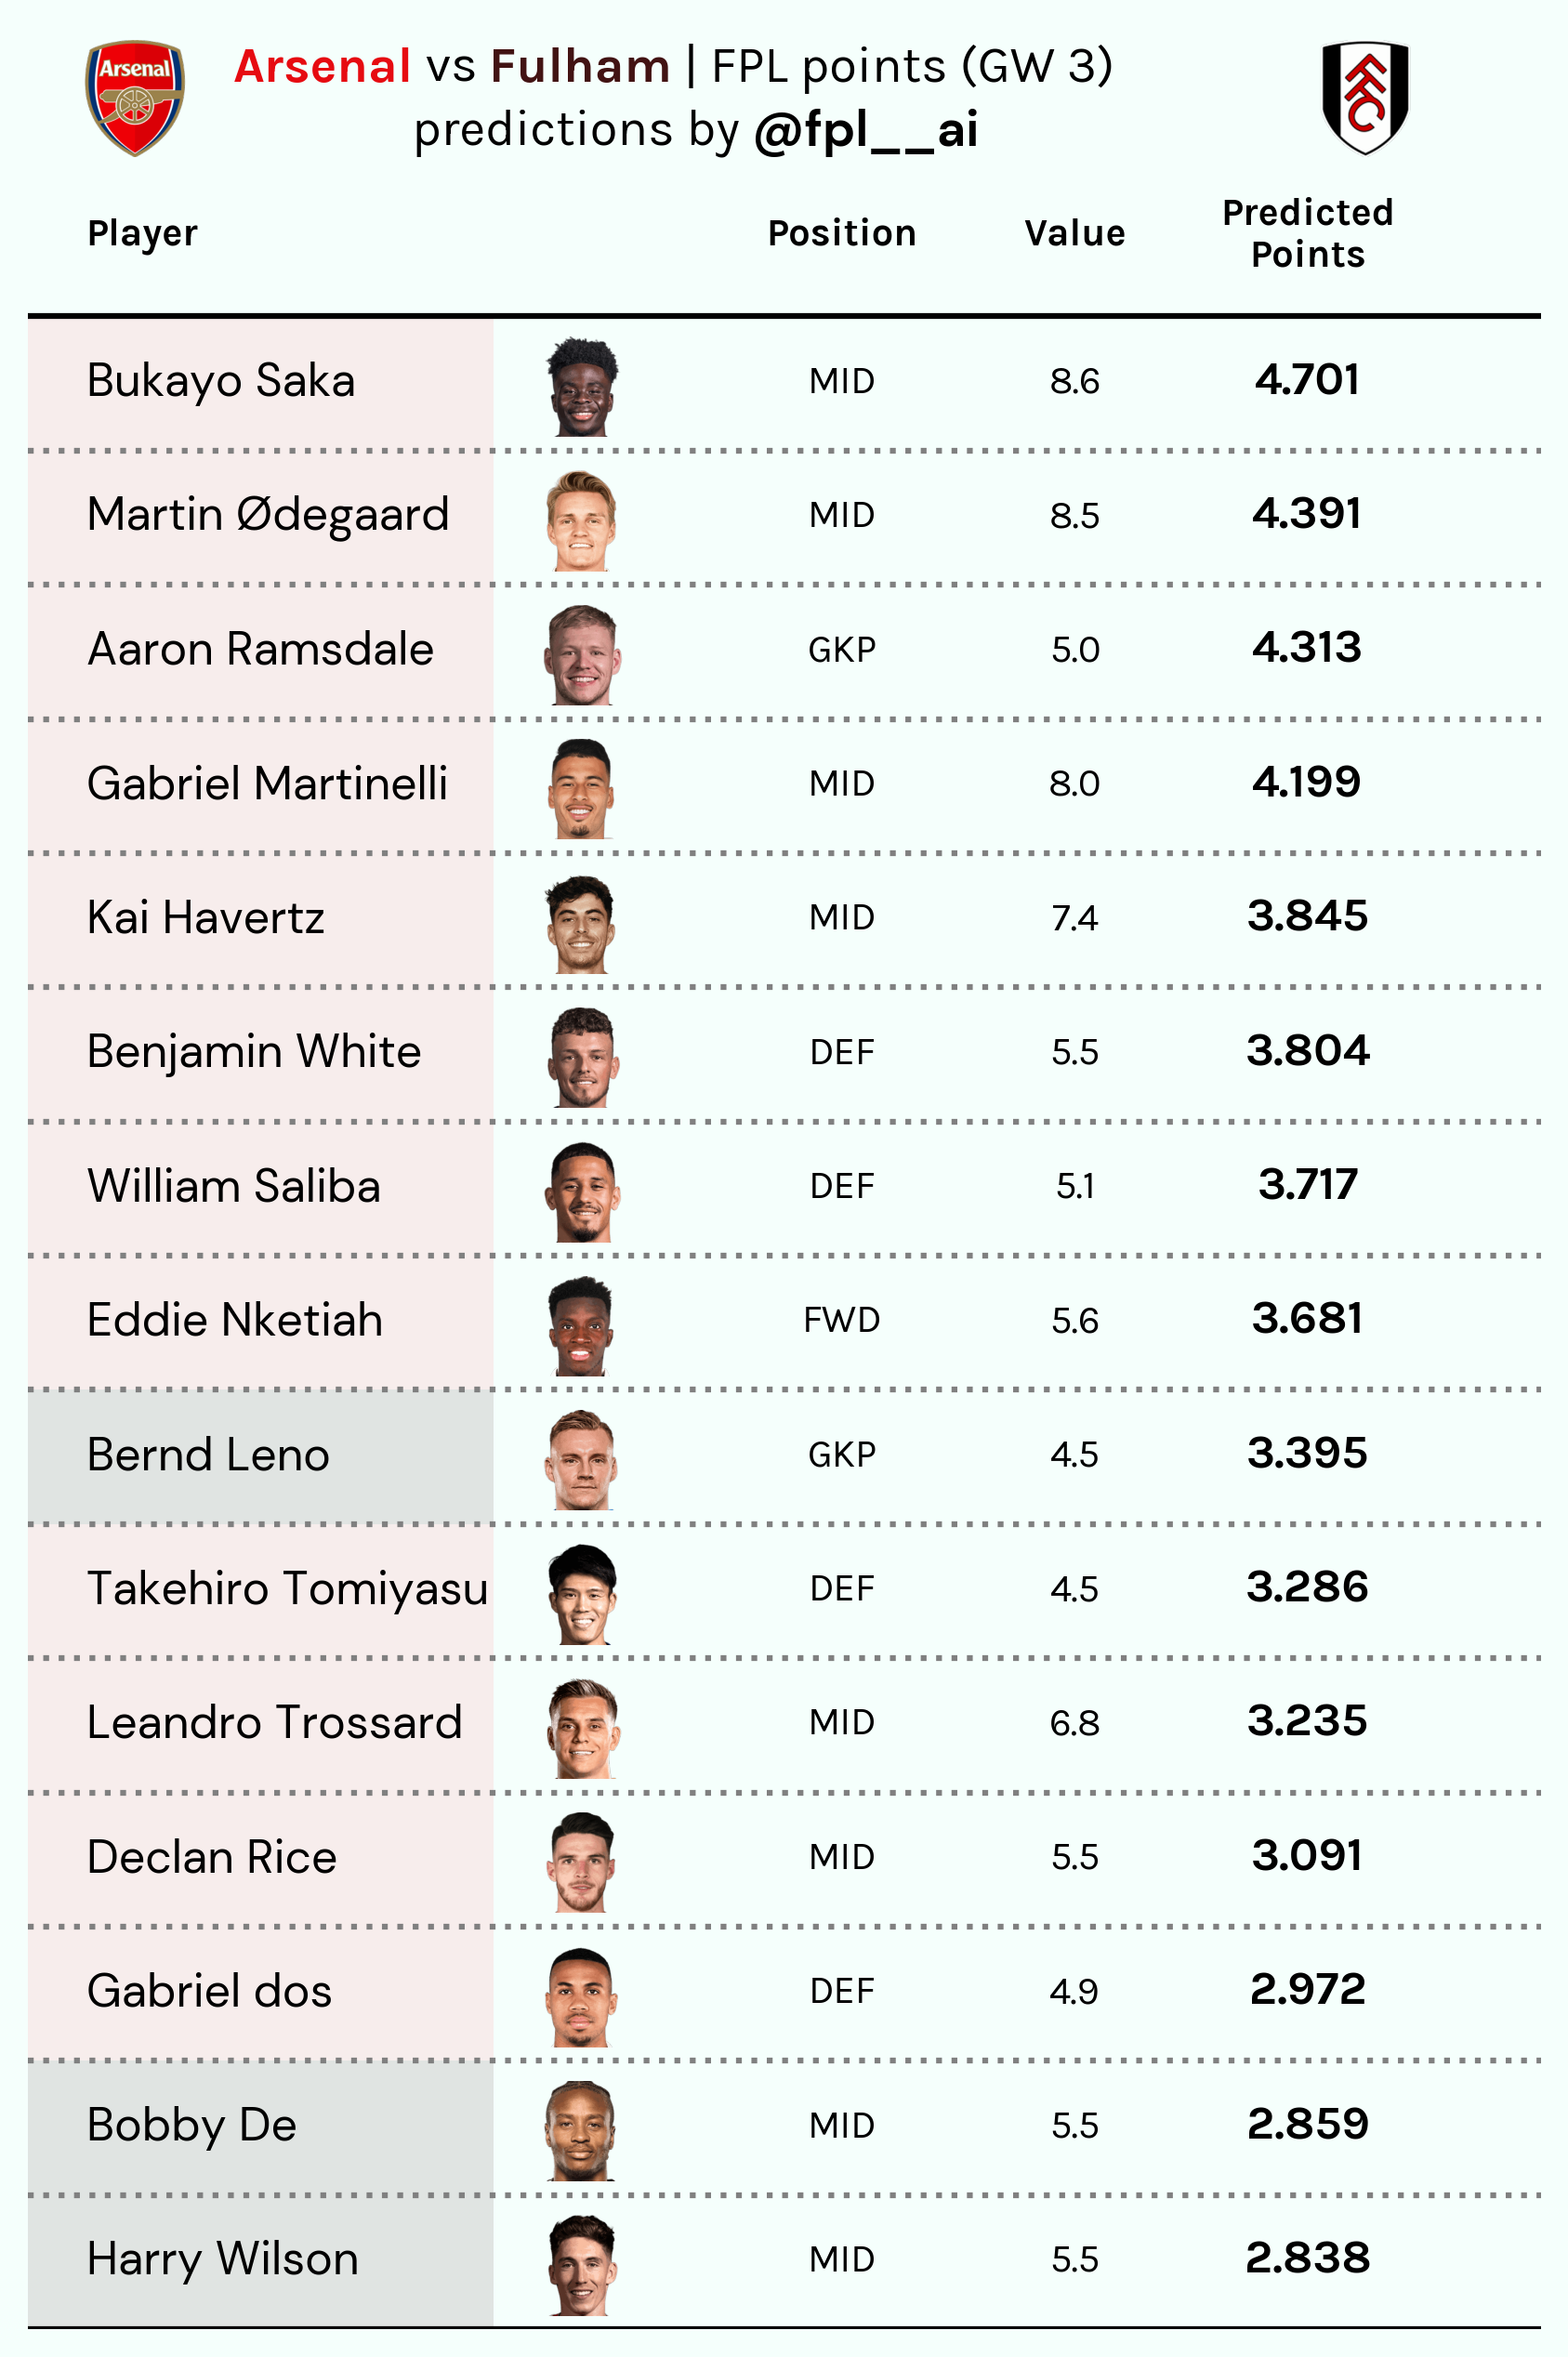

In [ ]:
ncols=df_club.shape[1]
nrows=df_club.shape[0]
color="#f5fffc"

fig = plt.figure(figsize=(7,10), dpi=300,facecolor = color)
ax = plt.subplot(facecolor =color)

ax.set_xlim(0, ncols+1.5)
ax.set_ylim(0, nrows+1)

positions=[0.25,3.5,4.5,5.5,6.5]
columns=df_club.columns

for i in range(nrows):
    for j,col in enumerate(columns):
      if j!=4:
        if j==0:
          ha="left"
          ax.annotate(
                    xy=(positions[j], i+0.5),
                    text=clean_name(df_club[col].iloc[i]),
                    ha=ha,
                    va='center',fontsize=12,fontfamily = "DM Sans",
                )
        elif j==3:
          ha = "center"
          ax.annotate(
                    xy=(positions[j], i+0.5),
                    text=df_club[col].iloc[i],
                    ha=ha,
                    va='center',weight="bold",fontsize=12
                )
        else:
          ha = "center"
          ax.annotate(
                    xy=(positions[j], i+0.5),
                    text=df_club[col].iloc[i],
                    ha=ha,
                    va='center'
                )

for i,team in enumerate(df_club["team"]):
  ax.fill_between(x=[0,2],y1=i+1,y2=i,color=club_colors[team],alpha=0.5,ec='None')







cols=["Player","Position","Value","Predicted\nPoints"]
for j, col in enumerate(cols):
    ha="center"
    if j==0:
        ha="left"
    ax.annotate(
            xy=(positions[j], nrows+0.6),
                text=f"{col}",
                ha=ha,
                va='center', weight="bold" )

ax.set_axis_off()

# Add dividing lines
ax.plot([ax.get_xlim()[0], ax.get_xlim()[1]], [nrows, nrows], lw=1.5, color='black', marker='', zorder=4)
ax.plot([ax.get_xlim()[0], ax.get_xlim()[1]], [0, 0], lw=1.5, color='black', marker='', zorder=4)
for i in range(1,nrows):
    ax.plot([ax.get_xlim()[0], ax.get_xlim()[1]], [i, i], lw=1.5, marker='', zorder=4,color='gray', ls=':')

# -- Transformation functions
DC_to_FC = ax.transData.transform
FC_to_NFC = fig.transFigure.inverted().transform
# -- Take data coordinates and transform them to normalized figure coordinates
DC_to_NFC = lambda x: FC_to_NFC(DC_to_FC(x))
# -- Add nation axes
ax_point_1 = DC_to_NFC([2.25, 0.5])
ax_point_2 = DC_to_NFC([3, 1.25])
ax_width = abs(ax_point_1[0] - ax_point_2[0])
ax_height = abs(ax_point_1[1] - ax_point_2[1])
for x in range(0, nrows):
    ax_coords = DC_to_NFC([2, x + .1])
    flag_ax = fig.add_axes(
        [ax_coords[0], ax_coords[1], ax_width, ax_height]
    )
    #print(df_club["name"])
    name=df_club["name"].iloc[x]
    try:
      player_url=f"https://images.fotmob.com/image_resources/playerimages/{player_images[name]}"
      ax_player(player_url, flag_ax)
    except HTTPError:
      ax_player("https://www.fotmob.com/_next/static/media/player_fallback.9cac7bea.png", flag_ax)


#header and logo
fig_text(
    x = 0.23, y = 0.93,
    s = f"<{clubs[0]}> vs <{clubs[1]}> | FPL points (GW {gameweek})\n               predictions by <@fpl__ai>",
    color = "black",
    size = 13,
    highlight_textprops = [
        {"weight":"bold","color":f"{club_texts[clubs[0]]}"},
        {"weight":"bold","color":f"{club_texts[clubs[1]]}"},
        {"weight":"bold","family": "DM Sans",},
    ],
    annotationbbox_kw={"xycoords": "figure fraction"}
)


#Get and Open the club logo
club_logo1 = Image.open(urllib.request.urlopen(club_logos[clubs[0]]))
#create new axes at top right corner [left_position,bottom_position,width,hight]
logo_ax = fig.add_axes([0.15, 0.88, 0.06, 0.06])
#paste logo on the axes
logo_ax.imshow(club_logo1)
#switch off  the axis off our AXES
logo_ax.axis("off")

#Get and Open the club logo
club_logo2 = Image.open(urllib.request.urlopen(club_logos[clubs[1]]))
#create new axes at top right corner [left_position,bottom_position,width,hight]
logo_ax = fig.add_axes([0.78, 0.88, 0.06, 0.06])
#paste logo on the axes
logo_ax.imshow(club_logo2)
#switch off  the axis off our AXES
logo_ax.axis("off")

## Match 4

In [ ]:
clubs=["Brentford","Crystal Palace"]
df_club=df[df["team"].isin(clubs)].sort_values("points").reset_index()[["name","position","value","points","team"]].tail(15)

In [ ]:
df_club

name position  value  points            team
8         Joel Ward      DEF    4.5   3.053  Crystal Palace
9        Marc Guéhi      DEF    4.5   3.059  Crystal Palace
10   Nathan Collins      DEF    4.5   3.111       Brentford
11      Jordan Ayew      MID    5.5   3.128  Crystal Palace
12     Aaron Hickey      DEF    4.5   3.133       Brentford
13  Kristoffer Ajer      DEF    4.5   3.140       Brentford
14    Ethan Pinnock      DEF    4.5   3.158       Brentford
15   Mathias Jensen      MID    5.5   3.177       Brentford
16       Rico Henry      DEF    4.6   3.316       Brentford
17  Odsonne Edouard      FWD    5.5   3.371  Crystal Palace
18     Mark Flekken      GKP    4.5   3.962       Brentford
19    Sam Johnstone      GKP    4.5   4.156  Crystal Palace
20      Yoane Wissa      FWD    6.1   4.547       Brentford
21     Eberechi Eze      MID    6.4   4.865  Crystal Palace
22     Bryan Mbeumo      MID    6.7   4.969       Brentford

(-0.5, 191.5, 191.5, -0.5)

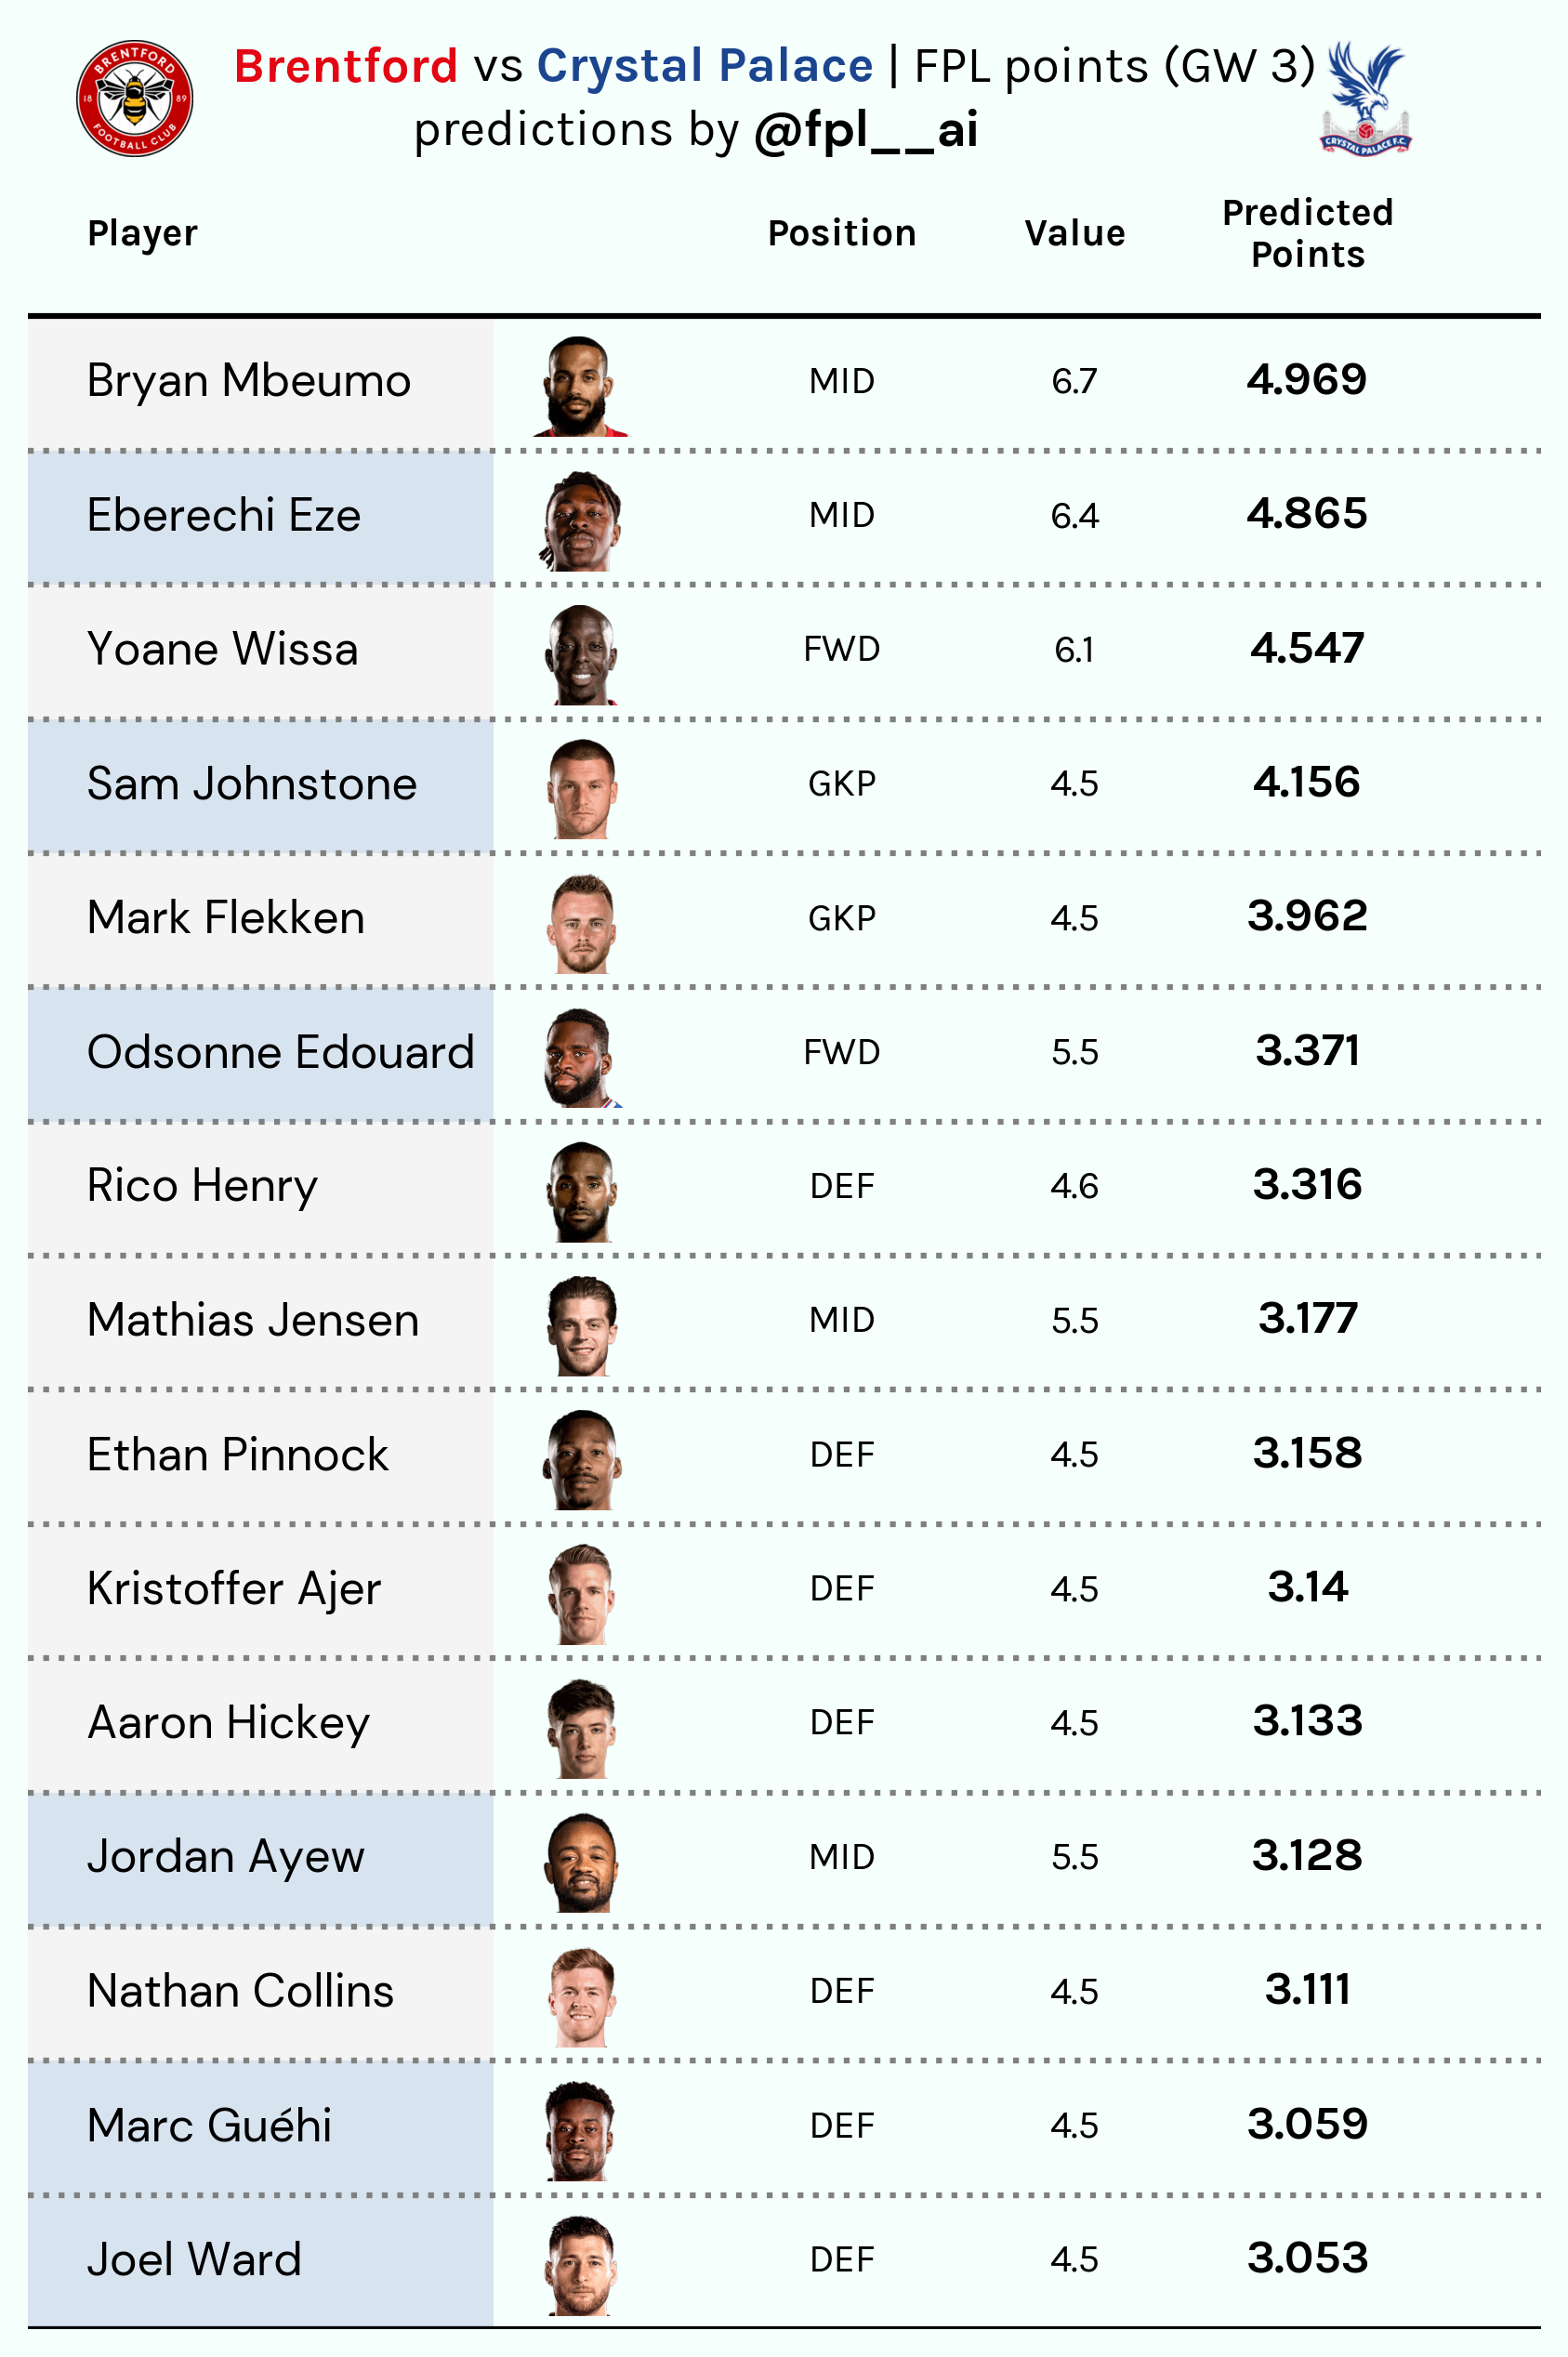

In [ ]:
ncols=df_club.shape[1]
nrows=df_club.shape[0]
color="#f5fffc"

fig = plt.figure(figsize=(7,10), dpi=300,facecolor = color)
ax = plt.subplot(facecolor =color)

ax.set_xlim(0, ncols+1.5)
ax.set_ylim(0, nrows+1)

positions=[0.25,3.5,4.5,5.5,6.5]
columns=df_club.columns

for i in range(nrows):
    for j,col in enumerate(columns):
      if j!=4:
        if j==0:
          ha="left"
          ax.annotate(
                    xy=(positions[j], i+0.5),
                    text=clean_name(df_club[col].iloc[i]),
                    ha=ha,
                    va='center',fontsize=12,fontfamily = "DM Sans",
                )
        elif j==3:
          ha = "center"
          ax.annotate(
                    xy=(positions[j], i+0.5),
                    text=df_club[col].iloc[i],
                    ha=ha,
                    va='center',weight="bold",fontsize=12
                )
        else:
          ha = "center"
          ax.annotate(
                    xy=(positions[j], i+0.5),
                    text=df_club[col].iloc[i],
                    ha=ha,
                    va='center'
                )

for i,team in enumerate(df_club["team"]):
  ax.fill_between(x=[0,2],y1=i+1,y2=i,color=club_colors[team],alpha=0.5,ec='None')







cols=["Player","Position","Value","Predicted\nPoints"]
for j, col in enumerate(cols):
    ha="center"
    if j==0:
        ha="left"
    ax.annotate(
            xy=(positions[j], nrows+0.6),
                text=f"{col}",
                ha=ha,
                va='center', weight="bold" )

ax.set_axis_off()

# Add dividing lines
ax.plot([ax.get_xlim()[0], ax.get_xlim()[1]], [nrows, nrows], lw=1.5, color='black', marker='', zorder=4)
ax.plot([ax.get_xlim()[0], ax.get_xlim()[1]], [0, 0], lw=1.5, color='black', marker='', zorder=4)
for i in range(1,nrows):
    ax.plot([ax.get_xlim()[0], ax.get_xlim()[1]], [i, i], lw=1.5, marker='', zorder=4,color='gray', ls=':')

# -- Transformation functions
DC_to_FC = ax.transData.transform
FC_to_NFC = fig.transFigure.inverted().transform
# -- Take data coordinates and transform them to normalized figure coordinates
DC_to_NFC = lambda x: FC_to_NFC(DC_to_FC(x))
# -- Add nation axes
ax_point_1 = DC_to_NFC([2.25, 0.5])
ax_point_2 = DC_to_NFC([3, 1.25])
ax_width = abs(ax_point_1[0] - ax_point_2[0])
ax_height = abs(ax_point_1[1] - ax_point_2[1])
for x in range(0, nrows):
    ax_coords = DC_to_NFC([2, x + .1])
    flag_ax = fig.add_axes(
        [ax_coords[0], ax_coords[1], ax_width, ax_height]
    )
    #print(df_club["name"])
    name=df_club["name"].iloc[x]
    try:
      player_url=f"https://images.fotmob.com/image_resources/playerimages/{player_images[name]}"
      ax_player(player_url, flag_ax)
    except HTTPError:
      ax_player("https://www.fotmob.com/_next/static/media/player_fallback.9cac7bea.png", flag_ax)


#header and logo
fig_text(
    x = 0.23, y = 0.93,
    s = f"<{clubs[0]}> vs <{clubs[1]}> | FPL points (GW {gameweek})\n               predictions by <@fpl__ai>",
    color = "black",
    size = 13,
    highlight_textprops = [
        {"weight":"bold","color":f"{club_texts[clubs[0]]}"},
        {"weight":"bold","color":f"{club_texts[clubs[1]]}"},
        {"weight":"bold","family": "DM Sans",},
    ],
    annotationbbox_kw={"xycoords": "figure fraction"}
)


#Get and Open the club logo
club_logo1 = Image.open(urllib.request.urlopen(club_logos[clubs[0]]))
#create new axes at top right corner [left_position,bottom_position,width,hight]
logo_ax = fig.add_axes([0.15, 0.88, 0.06, 0.06])
#paste logo on the axes
logo_ax.imshow(club_logo1)
#switch off  the axis off our AXES
logo_ax.axis("off")

#Get and Open the club logo
club_logo2 = Image.open(urllib.request.urlopen(club_logos[clubs[1]]))
#create new axes at top right corner [left_position,bottom_position,width,hight]
logo_ax = fig.add_axes([0.78, 0.88, 0.06, 0.06])
#paste logo on the axes
logo_ax.imshow(club_logo2)
#switch off  the axis off our AXES
logo_ax.axis("off")

## Match 5

In [ ]:
clubs=["Everton","Wolves"]
df_club=df[df["team"].isin(clubs)].sort_values("points").reset_index()[["name","position","value","points","team"]].tail(15)

In [ ]:
df_club

name position  value  points     team
14                     Jack Harrison      MID    5.5   2.893  Everton
15              Nélson Cabral Semedo      DEF    4.5   2.928   Wolves
16                  Nathan Patterson      DEF    4.5   2.991  Everton
17                       Fábio Silva      FWD    5.5   3.028   Wolves
18                      Craig Dawson      DEF    4.5   3.038   Wolves
19                     Michael Keane      DEF    4.5   3.046  Everton
20                    Hwang Hee-chan      MID    5.5   3.072   Wolves
21                   James Tarkowski      DEF    4.5   3.110  Everton
22                      Ashley Young      DEF    4.5   3.182  Everton
23                  Pedro Lomba Neto      MID    5.5   3.390   Wolves
24                Abdoulaye Doucouré      MID    5.5   3.491  Everton
25                   Jordan Pickford      GKP    4.5   3.602  Everton
26  Matheus Santos Carneiro Da Cunha      FWD    5.5   3.646   Wolves
27                        Alex Iwobi      MID    5.5   3.821  Everton
28               José Malheiro de Sá      GKP    5.0   3.834   Wolves

(-0.5, 191.5, 191.5, -0.5)

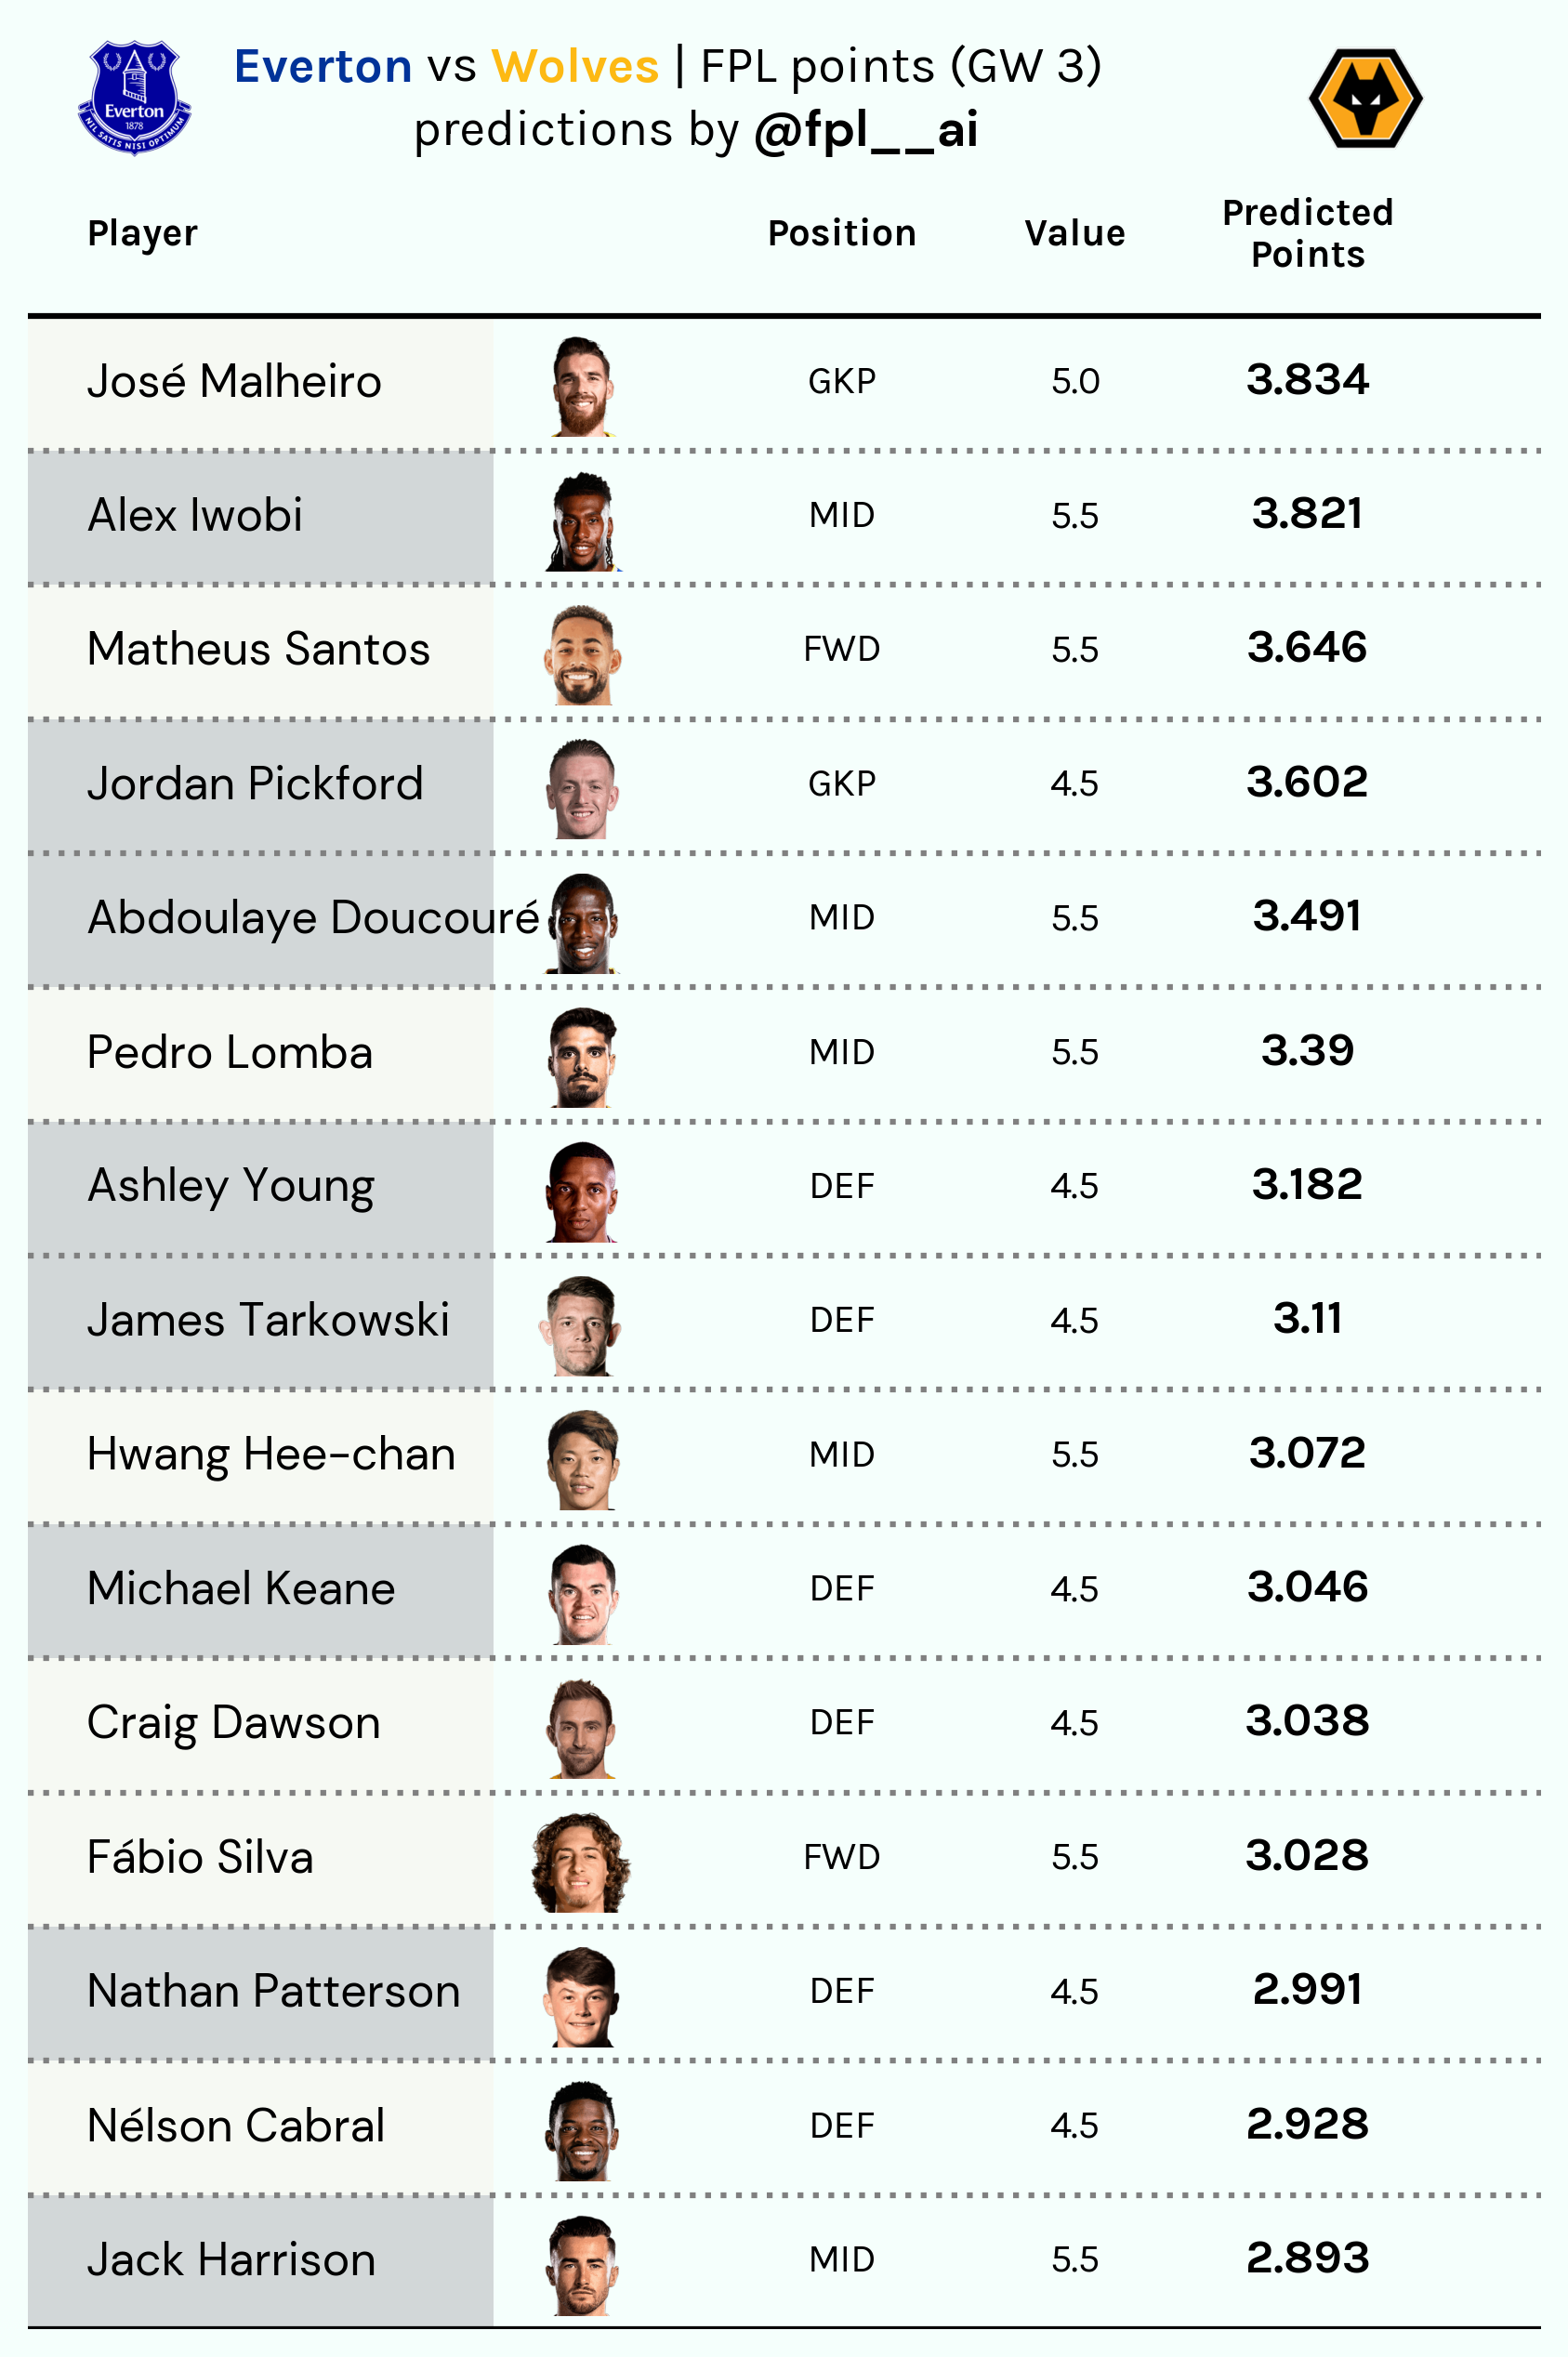

In [ ]:
ncols=df_club.shape[1]
nrows=df_club.shape[0]
color="#f5fffc"

fig = plt.figure(figsize=(7,10), dpi=300,facecolor = color)
ax = plt.subplot(facecolor =color)

ax.set_xlim(0, ncols+1.5)
ax.set_ylim(0, nrows+1)

positions=[0.25,3.5,4.5,5.5,6.5]
columns=df_club.columns

for i in range(nrows):
    for j,col in enumerate(columns):
      if j!=4:
        if j==0:
          ha="left"
          ax.annotate(
                    xy=(positions[j], i+0.5),
                    text=clean_name(df_club[col].iloc[i]),
                    ha=ha,
                    va='center',fontsize=12,fontfamily = "DM Sans",
                )
        elif j==3:
          ha = "center"
          ax.annotate(
                    xy=(positions[j], i+0.5),
                    text=df_club[col].iloc[i],
                    ha=ha,
                    va='center',weight="bold",fontsize=12
                )
        else:
          ha = "center"
          ax.annotate(
                    xy=(positions[j], i+0.5),
                    text=df_club[col].iloc[i],
                    ha=ha,
                    va='center'
                )

for i,team in enumerate(df_club["team"]):
  ax.fill_between(x=[0,2],y1=i+1,y2=i,color=club_colors[team],alpha=0.5,ec='None')







cols=["Player","Position","Value","Predicted\nPoints"]
for j, col in enumerate(cols):
    ha="center"
    if j==0:
        ha="left"
    ax.annotate(
            xy=(positions[j], nrows+0.6),
                text=f"{col}",
                ha=ha,
                va='center', weight="bold" )

ax.set_axis_off()

# Add dividing lines
ax.plot([ax.get_xlim()[0], ax.get_xlim()[1]], [nrows, nrows], lw=1.5, color='black', marker='', zorder=4)
ax.plot([ax.get_xlim()[0], ax.get_xlim()[1]], [0, 0], lw=1.5, color='black', marker='', zorder=4)
for i in range(1,nrows):
    ax.plot([ax.get_xlim()[0], ax.get_xlim()[1]], [i, i], lw=1.5, marker='', zorder=4,color='gray', ls=':')

# -- Transformation functions
DC_to_FC = ax.transData.transform
FC_to_NFC = fig.transFigure.inverted().transform
# -- Take data coordinates and transform them to normalized figure coordinates
DC_to_NFC = lambda x: FC_to_NFC(DC_to_FC(x))
# -- Add nation axes
ax_point_1 = DC_to_NFC([2.25, 0.5])
ax_point_2 = DC_to_NFC([3, 1.25])
ax_width = abs(ax_point_1[0] - ax_point_2[0])
ax_height = abs(ax_point_1[1] - ax_point_2[1])
for x in range(0, nrows):
    ax_coords = DC_to_NFC([2, x + .1])
    flag_ax = fig.add_axes(
        [ax_coords[0], ax_coords[1], ax_width, ax_height]
    )
    #print(df_club["name"])
    name=df_club["name"].iloc[x]
    try:
      player_url=f"https://images.fotmob.com/image_resources/playerimages/{player_images[name]}"
      ax_player(player_url, flag_ax)
    except HTTPError:
      ax_player("https://www.fotmob.com/_next/static/media/player_fallback.9cac7bea.png", flag_ax)


#header and logo
fig_text(
    x = 0.23, y = 0.93,
    s = f"<{clubs[0]}> vs <{clubs[1]}> | FPL points (GW {gameweek})\n               predictions by <@fpl__ai>",
    color = "black",
    size = 13,
    highlight_textprops = [
        {"weight":"bold","color":f"{club_texts[clubs[0]]}"},
        {"weight":"bold","color":f"{club_texts[clubs[1]]}"},
        {"weight":"bold","family": "DM Sans",},
    ],
    annotationbbox_kw={"xycoords": "figure fraction"}
)


#Get and Open the club logo
club_logo1 = Image.open(urllib.request.urlopen(club_logos[clubs[0]]))
#create new axes at top right corner [left_position,bottom_position,width,hight]
logo_ax = fig.add_axes([0.15, 0.88, 0.06, 0.06])
#paste logo on the axes
logo_ax.imshow(club_logo1)
#switch off  the axis off our AXES
logo_ax.axis("off")

#Get and Open the club logo
club_logo2 = Image.open(urllib.request.urlopen(club_logos[clubs[1]]))
#create new axes at top right corner [left_position,bottom_position,width,hight]
logo_ax = fig.add_axes([0.78, 0.88, 0.06, 0.06])
#paste logo on the axes
logo_ax.imshow(club_logo2)
#switch off  the axis off our AXES
logo_ax.axis("off")

## Match 6

In [ ]:
clubs=["Man Utd","Nott'm Forest"]
df_club=df[df["team"].isin(clubs)].sort_values("points").reset_index()[["name","position","value","points","team"]].tail(15)

In [ ]:
df_club

name position  value  points           team
13                Matt Turner      GKP    4.0   2.748  Nott'm Forest
14               Jadon Sancho      MID    6.9   2.776        Man Utd
15         Alejandro Garnacho      MID    5.0   2.937        Man Utd
16         Morgan Gibbs-White      MID    6.0   3.296  Nott'm Forest
17                Mason Mount      MID    6.9   3.299        Man Utd
18   Carlos Henrique Casimiro      MID    5.5   3.421        Man Utd
19          Aaron Wan-Bissaka      DEF    4.6   3.479        Man Utd
20             Raphaël Varane      DEF    5.1   3.656        Man Utd
21          Lisandro Martínez      DEF    4.9   3.670        Man Utd
22                André Onana      GKP    5.0   3.707        Man Utd
23              Taiwo Awoniyi      FWD    6.5   3.780  Nott'm Forest
24  Antony Matheus dos Santos      MID    7.0   3.825        Man Utd
25                  Luke Shaw      DEF    5.5   4.152        Man Utd
26            Marcus Rashford      MID    9.0   4.585        Man Utd
27     Bruno Borges Fernandes      MID    8.5   5.592        Man Utd

(-0.5, 191.5, 191.5, -0.5)

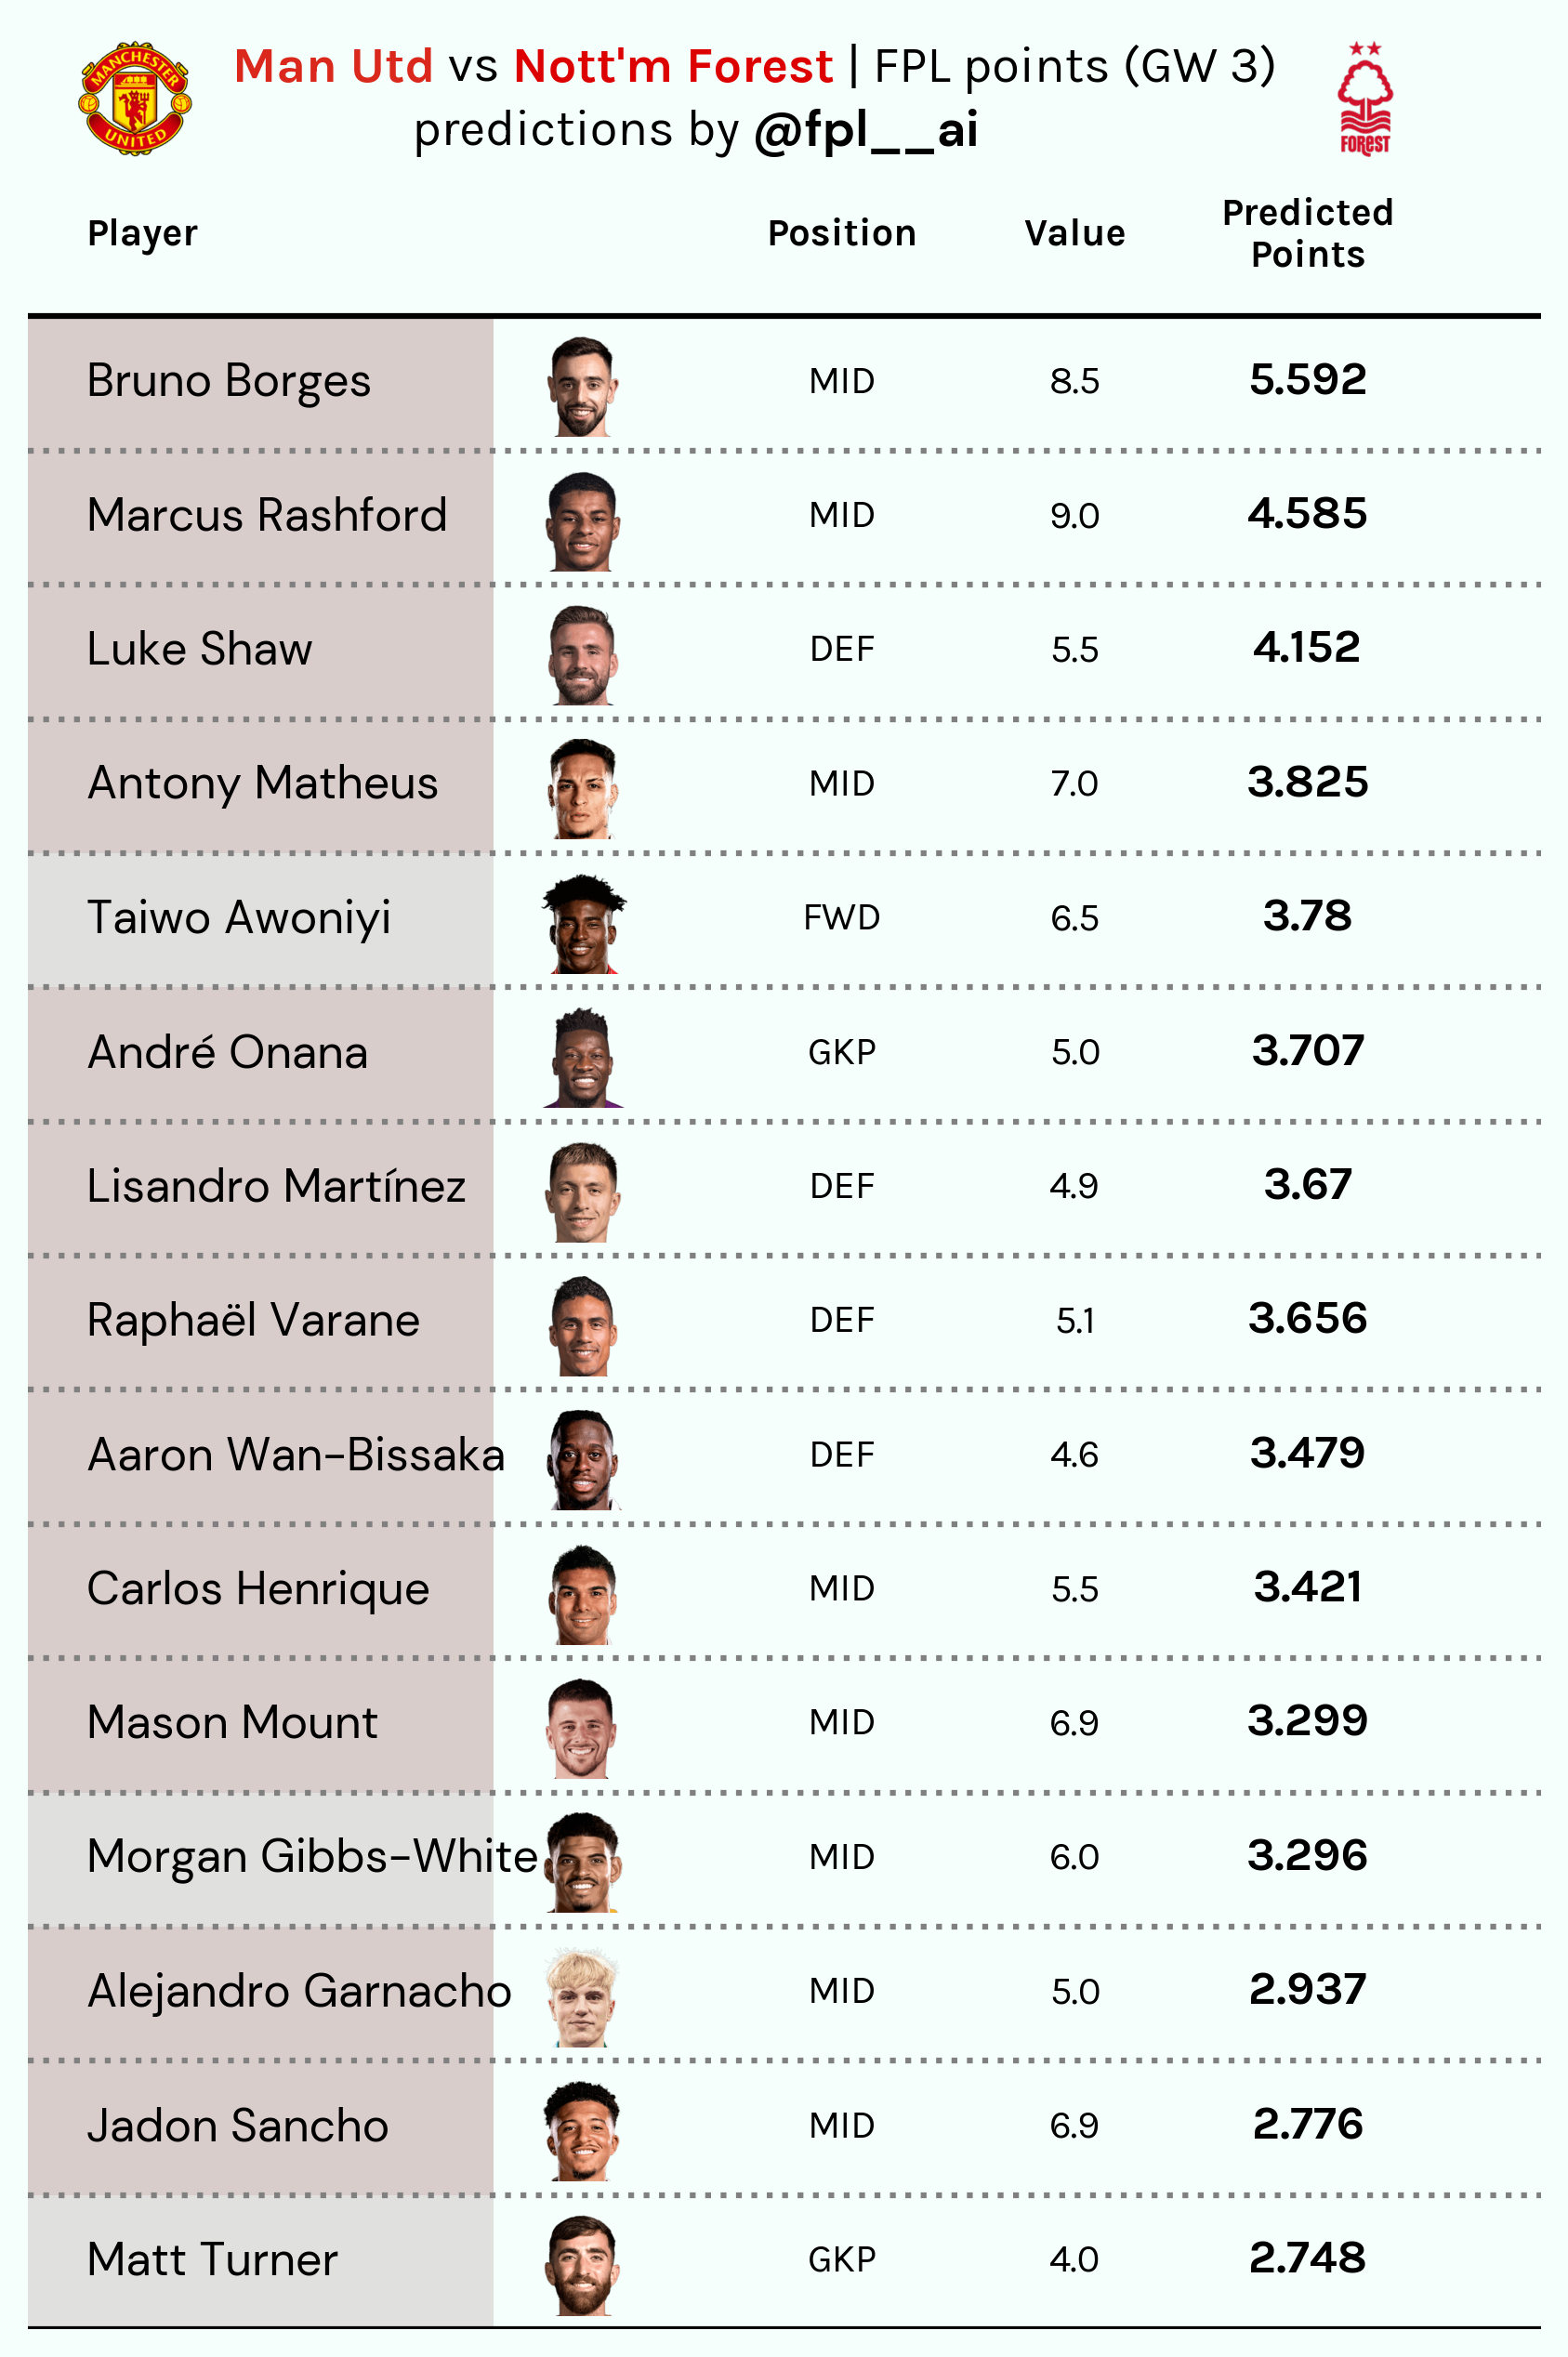

In [ ]:
ncols=df_club.shape[1]
nrows=df_club.shape[0]
color="#f5fffc"

fig = plt.figure(figsize=(7,10), dpi=300,facecolor = color)
ax = plt.subplot(facecolor =color)

ax.set_xlim(0, ncols+1.5)
ax.set_ylim(0, nrows+1)

positions=[0.25,3.5,4.5,5.5,6.5]
columns=df_club.columns

for i in range(nrows):
    for j,col in enumerate(columns):
      if j!=4:
        if j==0:
          ha="left"
          ax.annotate(
                    xy=(positions[j], i+0.5),
                    text=clean_name(df_club[col].iloc[i]),
                    ha=ha,
                    va='center',fontsize=12,fontfamily = "DM Sans",
                )
        elif j==3:
          ha = "center"
          ax.annotate(
                    xy=(positions[j], i+0.5),
                    text=df_club[col].iloc[i],
                    ha=ha,
                    va='center',weight="bold",fontsize=12
                )
        else:
          ha = "center"
          ax.annotate(
                    xy=(positions[j], i+0.5),
                    text=df_club[col].iloc[i],
                    ha=ha,
                    va='center'
                )

for i,team in enumerate(df_club["team"]):
  ax.fill_between(x=[0,2],y1=i+1,y2=i,color=club_colors[team],alpha=0.5,ec='None')







cols=["Player","Position","Value","Predicted\nPoints"]
for j, col in enumerate(cols):
    ha="center"
    if j==0:
        ha="left"
    ax.annotate(
            xy=(positions[j], nrows+0.6),
                text=f"{col}",
                ha=ha,
                va='center', weight="bold" )

ax.set_axis_off()

# Add dividing lines
ax.plot([ax.get_xlim()[0], ax.get_xlim()[1]], [nrows, nrows], lw=1.5, color='black', marker='', zorder=4)
ax.plot([ax.get_xlim()[0], ax.get_xlim()[1]], [0, 0], lw=1.5, color='black', marker='', zorder=4)
for i in range(1,nrows):
    ax.plot([ax.get_xlim()[0], ax.get_xlim()[1]], [i, i], lw=1.5, marker='', zorder=4,color='gray', ls=':')

# -- Transformation functions
DC_to_FC = ax.transData.transform
FC_to_NFC = fig.transFigure.inverted().transform
# -- Take data coordinates and transform them to normalized figure coordinates
DC_to_NFC = lambda x: FC_to_NFC(DC_to_FC(x))
# -- Add nation axes
ax_point_1 = DC_to_NFC([2.25, 0.5])
ax_point_2 = DC_to_NFC([3, 1.25])
ax_width = abs(ax_point_1[0] - ax_point_2[0])
ax_height = abs(ax_point_1[1] - ax_point_2[1])
for x in range(0, nrows):
    ax_coords = DC_to_NFC([2, x + .1])
    flag_ax = fig.add_axes(
        [ax_coords[0], ax_coords[1], ax_width, ax_height]
    )
    #print(df_club["name"])
    name=df_club["name"].iloc[x]
    try:
      player_url=f"https://images.fotmob.com/image_resources/playerimages/{player_images[name]}"
      ax_player(player_url, flag_ax)
    except HTTPError:
      ax_player("https://www.fotmob.com/_next/static/media/player_fallback.9cac7bea.png", flag_ax)


#header and logo
fig_text(
    x = 0.23, y = 0.93,
    s = f"<{clubs[0]}> vs <{clubs[1]}> | FPL points (GW {gameweek})\n               predictions by <@fpl__ai>",
    color = "black",
    size = 13,
    highlight_textprops = [
        {"weight":"bold","color":f"{club_texts[clubs[0]]}"},
        {"weight":"bold","color":f"{club_texts[clubs[1]]}"},
        {"weight":"bold","family": "DM Sans",},
    ],
    annotationbbox_kw={"xycoords": "figure fraction"}
)


#Get and Open the club logo
club_logo1 = Image.open(urllib.request.urlopen(club_logos[clubs[0]]))
#create new axes at top right corner [left_position,bottom_position,width,hight]
logo_ax = fig.add_axes([0.15, 0.88, 0.06, 0.06])
#paste logo on the axes
logo_ax.imshow(club_logo1)
#switch off  the axis off our AXES
logo_ax.axis("off")

#Get and Open the club logo
club_logo2 = Image.open(urllib.request.urlopen(club_logos[clubs[1]]))
#create new axes at top right corner [left_position,bottom_position,width,hight]
logo_ax = fig.add_axes([0.78, 0.88, 0.06, 0.06])
#paste logo on the axes
logo_ax.imshow(club_logo2)
#switch off  the axis off our AXES
logo_ax.axis("off")

## Match 7

In [ ]:
clubs=["Brighton","West Ham"]
df_club=df[df["team"].isin(clubs)].sort_values("points").reset_index()[["name","position","value","points","team"]].tail(15)

In [ ]:
df_club

name position  value  points      team
13                   Saïd Benrahma      MID    6.0   3.044  West Ham
14                   Simon Adingra      MID    5.0   3.050  Brighton
15                 Michail Antonio      FWD    6.0   3.074  West Ham
16  Lucas Tolentino Coelho de Lima      MID    6.0   3.144  West Ham
17               James Ward-Prowse      MID    6.0   3.249  West Ham
18                    Julio Enciso      MID    5.4   3.281  Brighton
19                 Alphonse Areola      GKP    4.0   3.511  West Ham
20                      Lewis Dunk      DEF    5.0   3.530  Brighton
21                    Adam Webster      DEF    4.4   3.651  Brighton
22                    Jason Steele      GKP    4.5   4.188  Brighton
23                    Jarrod Bowen      MID    7.0   4.504  West Ham
24                     Pascal Groß      MID    6.4   4.581  Brighton
25                    Kaoru Mitoma      MID    6.6   4.804  Brighton
26                Pervis Estupiñán      DEF    5.2   4.978  Brighton
27                     Solly March      MID    6.6   5.026  Brighton

(-0.5, 191.5, 191.5, -0.5)

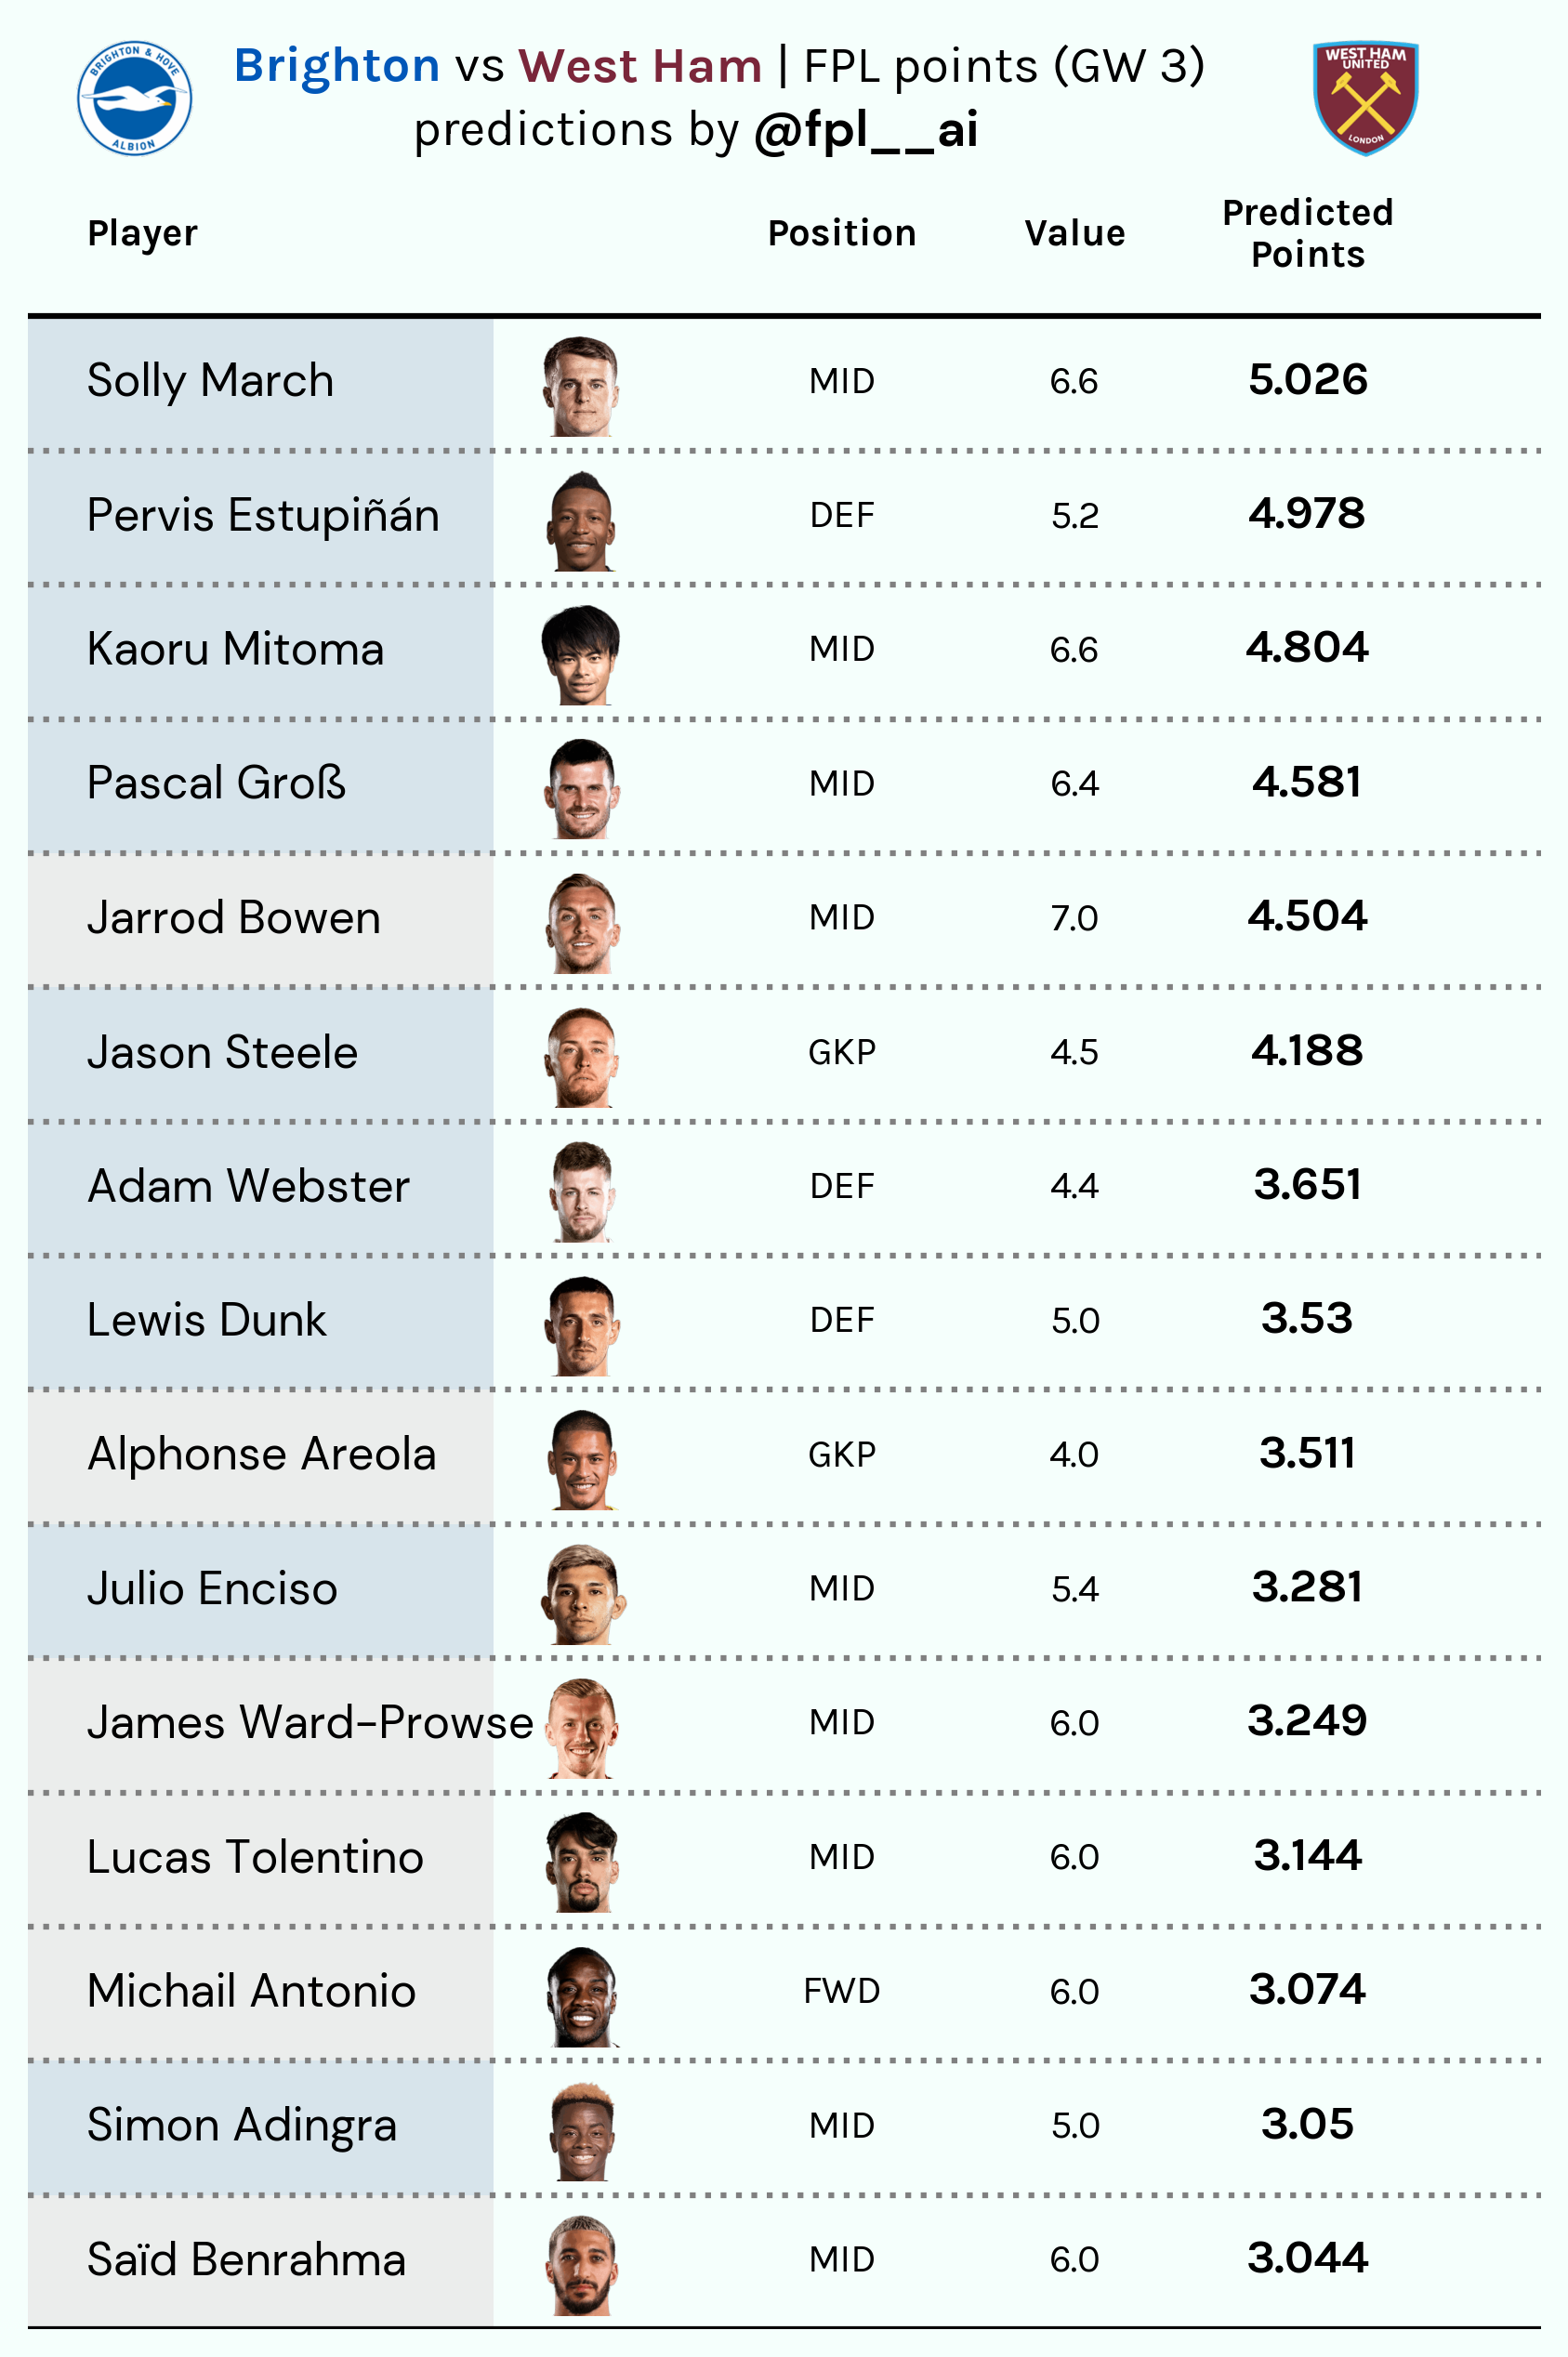

In [ ]:
ncols=df_club.shape[1]
nrows=df_club.shape[0]
color="#f5fffc"

fig = plt.figure(figsize=(7,10), dpi=300,facecolor = color)
ax = plt.subplot(facecolor =color)

ax.set_xlim(0, ncols+1.5)
ax.set_ylim(0, nrows+1)

positions=[0.25,3.5,4.5,5.5,6.5]
columns=df_club.columns

for i in range(nrows):
    for j,col in enumerate(columns):
      if j!=4:
        if j==0:
          ha="left"
          ax.annotate(
                    xy=(positions[j], i+0.5),
                    text=clean_name(df_club[col].iloc[i]),
                    ha=ha,
                    va='center',fontsize=12,fontfamily = "DM Sans",
                )
        elif j==3:
          ha = "center"
          ax.annotate(
                    xy=(positions[j], i+0.5),
                    text=df_club[col].iloc[i],
                    ha=ha,
                    va='center',weight="bold",fontsize=12
                )
        else:
          ha = "center"
          ax.annotate(
                    xy=(positions[j], i+0.5),
                    text=df_club[col].iloc[i],
                    ha=ha,
                    va='center'
                )

for i,team in enumerate(df_club["team"]):
  ax.fill_between(x=[0,2],y1=i+1,y2=i,color=club_colors[team],alpha=0.5,ec='None')







cols=["Player","Position","Value","Predicted\nPoints"]
for j, col in enumerate(cols):
    ha="center"
    if j==0:
        ha="left"
    ax.annotate(
            xy=(positions[j], nrows+0.6),
                text=f"{col}",
                ha=ha,
                va='center', weight="bold" )

ax.set_axis_off()

# Add dividing lines
ax.plot([ax.get_xlim()[0], ax.get_xlim()[1]], [nrows, nrows], lw=1.5, color='black', marker='', zorder=4)
ax.plot([ax.get_xlim()[0], ax.get_xlim()[1]], [0, 0], lw=1.5, color='black', marker='', zorder=4)
for i in range(1,nrows):
    ax.plot([ax.get_xlim()[0], ax.get_xlim()[1]], [i, i], lw=1.5, marker='', zorder=4,color='gray', ls=':')

# -- Transformation functions
DC_to_FC = ax.transData.transform
FC_to_NFC = fig.transFigure.inverted().transform
# -- Take data coordinates and transform them to normalized figure coordinates
DC_to_NFC = lambda x: FC_to_NFC(DC_to_FC(x))
# -- Add nation axes
ax_point_1 = DC_to_NFC([2.25, 0.5])
ax_point_2 = DC_to_NFC([3, 1.25])
ax_width = abs(ax_point_1[0] - ax_point_2[0])
ax_height = abs(ax_point_1[1] - ax_point_2[1])
for x in range(0, nrows):
    ax_coords = DC_to_NFC([2, x + .1])
    flag_ax = fig.add_axes(
        [ax_coords[0], ax_coords[1], ax_width, ax_height]
    )
    #print(df_club["name"])
    name=df_club["name"].iloc[x]
    try:
      player_url=f"https://images.fotmob.com/image_resources/playerimages/{player_images[name]}"
      ax_player(player_url, flag_ax)
    except HTTPError:
      ax_player("https://www.fotmob.com/_next/static/media/player_fallback.9cac7bea.png", flag_ax)


#header and logo
fig_text(
    x = 0.23, y = 0.93,
    s = f"<{clubs[0]}> vs <{clubs[1]}> | FPL points (GW {gameweek})\n               predictions by <@fpl__ai>",
    color = "black",
    size = 13,
    highlight_textprops = [
        {"weight":"bold","color":f"{club_texts[clubs[0]]}"},
        {"weight":"bold","color":f"{club_texts[clubs[1]]}"},
        {"weight":"bold","family": "DM Sans",},
    ],
    annotationbbox_kw={"xycoords": "figure fraction"}
)


#Get and Open the club logo
club_logo1 = Image.open(urllib.request.urlopen(club_logos[clubs[0]]))
#create new axes at top right corner [left_position,bottom_position,width,hight]
logo_ax = fig.add_axes([0.15, 0.88, 0.06, 0.06])
#paste logo on the axes
logo_ax.imshow(club_logo1)
#switch off  the axis off our AXES
logo_ax.axis("off")

#Get and Open the club logo
club_logo2 = Image.open(urllib.request.urlopen(club_logos[clubs[1]]))
#create new axes at top right corner [left_position,bottom_position,width,hight]
logo_ax = fig.add_axes([0.78, 0.88, 0.06, 0.06])
#paste logo on the axes
logo_ax.imshow(club_logo2)
#switch off  the axis off our AXES
logo_ax.axis("off")

## Match 8

In [ ]:
clubs=["Burnley","Aston Villa"]
df_club=df[df["team"].isin(clubs)].sort_values("points").reset_index()[["name","position","value","points","team"]].tail(15)

In [ ]:
df_club

name position  value  points         team
12               Ameen Al-Dakhil      DEF    4.0   2.814      Burnley
13                    Jhon Durán      FWD    5.0   2.920  Aston Villa
14                  Jordan Beyer      DEF    4.0   2.955      Burnley
15  Douglas Luiz Soares de Paulo      MID    5.5   3.285  Aston Villa
16                   John McGinn      MID    5.5   3.328  Aston Villa
17                    Pau Torres      DEF    4.5   3.528  Aston Villa
18     Diego Carlos Santos Silva      DEF    4.5   3.571  Aston Villa
19              Ezri Konsa Ngoyo      DEF    4.5   3.590  Aston Villa
20                    Matty Cash      DEF    4.5   3.816  Aston Villa
21                   Leon Bailey      MID    5.5   3.869  Aston Villa
22      Emiliano Martínez Romero      GKP    5.0   3.955  Aston Villa
23                   Lucas Digne      DEF    4.5   4.099  Aston Villa
24                  Moussa Diaby      MID    6.6   4.222  Aston Villa
25                 Ollie Watkins      FWD    8.0   4.401  Aston Villa
26                James Trafford      GKP    4.5   4.895      Burnley

(-0.5, 191.5, 191.5, -0.5)

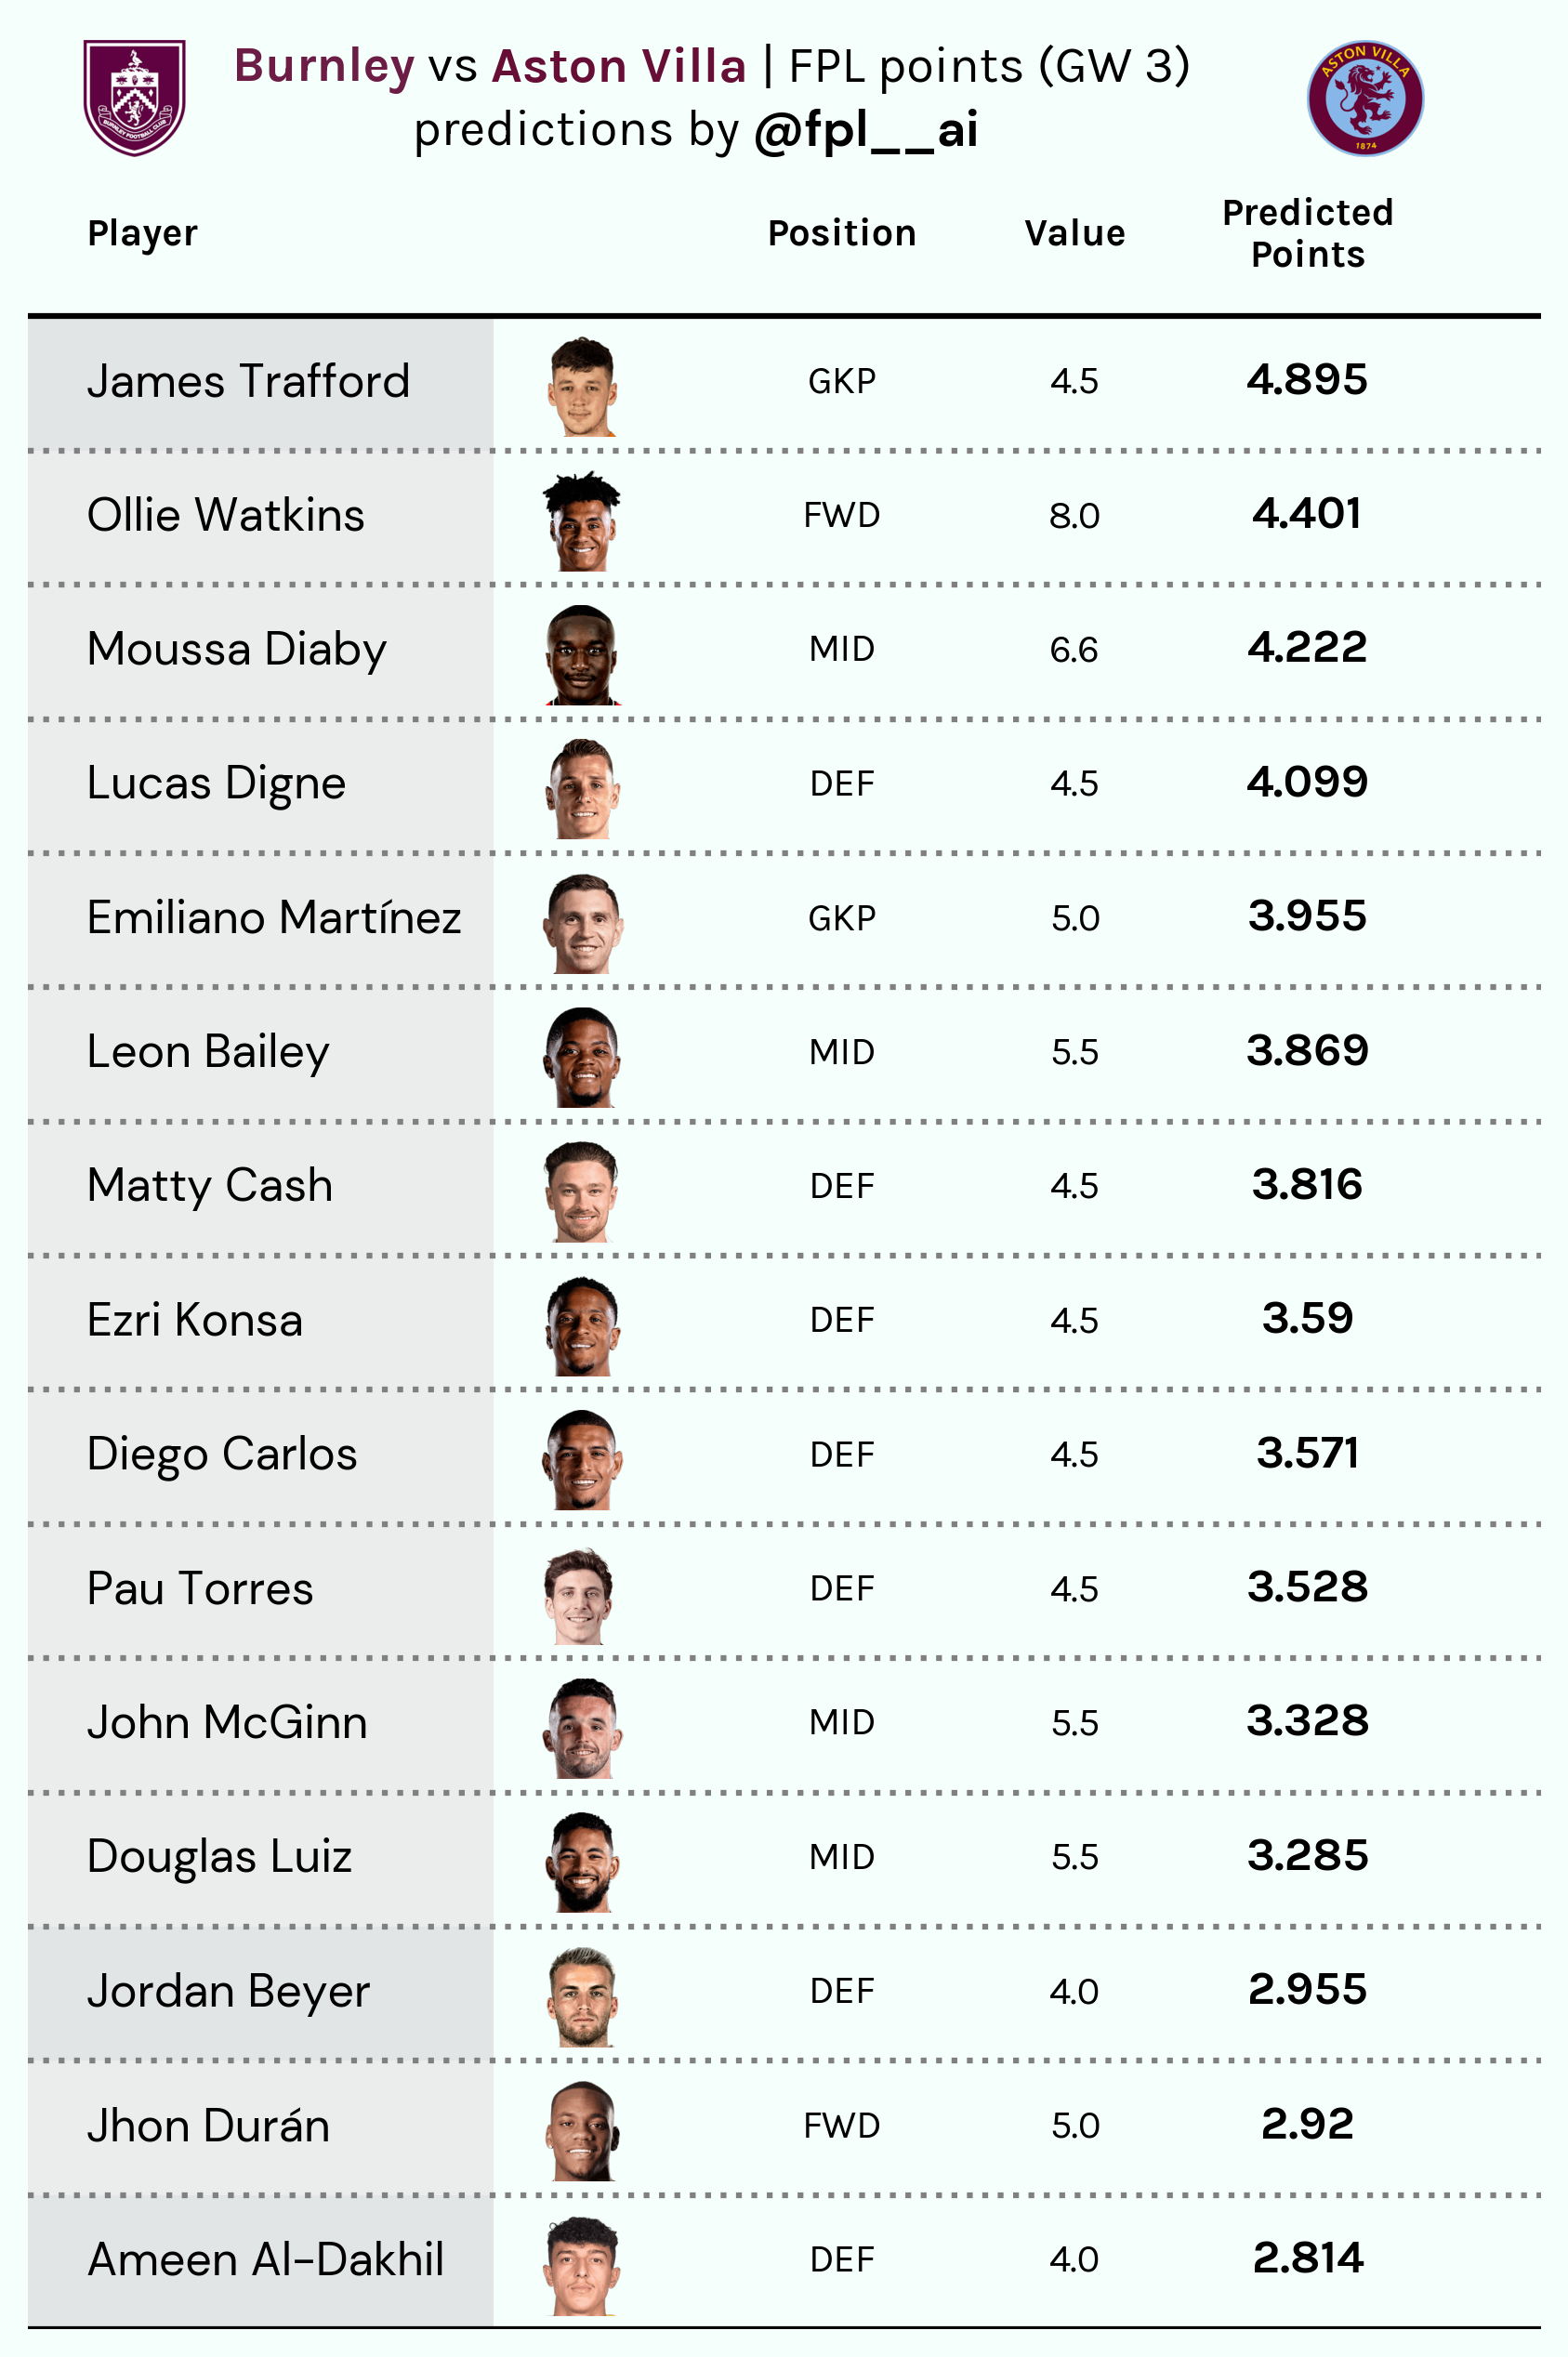

In [ ]:
ncols=df_club.shape[1]
nrows=df_club.shape[0]
color="#f5fffc"

fig = plt.figure(figsize=(7,10), dpi=300,facecolor = color)
ax = plt.subplot(facecolor =color)

ax.set_xlim(0, ncols+1.5)
ax.set_ylim(0, nrows+1)

positions=[0.25,3.5,4.5,5.5,6.5]
columns=df_club.columns

for i in range(nrows):
    for j,col in enumerate(columns):
      if j!=4:
        if j==0:
          ha="left"
          ax.annotate(
                    xy=(positions[j], i+0.5),
                    text=clean_name(df_club[col].iloc[i]),
                    ha=ha,
                    va='center',fontsize=12,fontfamily = "DM Sans",
                )
        elif j==3:
          ha = "center"
          ax.annotate(
                    xy=(positions[j], i+0.5),
                    text=df_club[col].iloc[i],
                    ha=ha,
                    va='center',weight="bold",fontsize=12
                )
        else:
          ha = "center"
          ax.annotate(
                    xy=(positions[j], i+0.5),
                    text=df_club[col].iloc[i],
                    ha=ha,
                    va='center'
                )

for i,team in enumerate(df_club["team"]):
  ax.fill_between(x=[0,2],y1=i+1,y2=i,color=club_colors[team],alpha=0.5,ec='None')







cols=["Player","Position","Value","Predicted\nPoints"]
for j, col in enumerate(cols):
    ha="center"
    if j==0:
        ha="left"
    ax.annotate(
            xy=(positions[j], nrows+0.6),
                text=f"{col}",
                ha=ha,
                va='center', weight="bold" )

ax.set_axis_off()

# Add dividing lines
ax.plot([ax.get_xlim()[0], ax.get_xlim()[1]], [nrows, nrows], lw=1.5, color='black', marker='', zorder=4)
ax.plot([ax.get_xlim()[0], ax.get_xlim()[1]], [0, 0], lw=1.5, color='black', marker='', zorder=4)
for i in range(1,nrows):
    ax.plot([ax.get_xlim()[0], ax.get_xlim()[1]], [i, i], lw=1.5, marker='', zorder=4,color='gray', ls=':')

# -- Transformation functions
DC_to_FC = ax.transData.transform
FC_to_NFC = fig.transFigure.inverted().transform
# -- Take data coordinates and transform them to normalized figure coordinates
DC_to_NFC = lambda x: FC_to_NFC(DC_to_FC(x))
# -- Add nation axes
ax_point_1 = DC_to_NFC([2.25, 0.5])
ax_point_2 = DC_to_NFC([3, 1.25])
ax_width = abs(ax_point_1[0] - ax_point_2[0])
ax_height = abs(ax_point_1[1] - ax_point_2[1])
for x in range(0, nrows):
    ax_coords = DC_to_NFC([2, x + .1])
    flag_ax = fig.add_axes(
        [ax_coords[0], ax_coords[1], ax_width, ax_height]
    )
    #print(df_club["name"])
    name=df_club["name"].iloc[x]
    try:
      player_url=f"https://images.fotmob.com/image_resources/playerimages/{player_images[name]}"
      ax_player(player_url, flag_ax)
    except HTTPError:
      ax_player("https://www.fotmob.com/_next/static/media/player_fallback.9cac7bea.png", flag_ax)


#header and logo
fig_text(
    x = 0.23, y = 0.93,
    s = f"<{clubs[0]}> vs <{clubs[1]}> | FPL points (GW {gameweek})\n               predictions by <@fpl__ai>",
    color = "black",
    size = 13,
    highlight_textprops = [
        {"weight":"bold","color":f"{club_texts[clubs[0]]}"},
        {"weight":"bold","color":f"{club_texts[clubs[1]]}"},
        {"weight":"bold","family": "DM Sans",},
    ],
    annotationbbox_kw={"xycoords": "figure fraction"}
)


#Get and Open the club logo
club_logo1 = Image.open(urllib.request.urlopen(club_logos[clubs[0]]))
#create new axes at top right corner [left_position,bottom_position,width,hight]
logo_ax = fig.add_axes([0.15, 0.88, 0.06, 0.06])
#paste logo on the axes
logo_ax.imshow(club_logo1)
#switch off  the axis off our AXES
logo_ax.axis("off")

#Get and Open the club logo
club_logo2 = Image.open(urllib.request.urlopen(club_logos[clubs[1]]))
#create new axes at top right corner [left_position,bottom_position,width,hight]
logo_ax = fig.add_axes([0.78, 0.88, 0.06, 0.06])
#paste logo on the axes
logo_ax.imshow(club_logo2)
#switch off  the axis off our AXES
logo_ax.axis("off")

## Match 9

In [ ]:
clubs=["Sheffield Utd","Man City"]
df_club=df[df["team"].isin(clubs)].sort_values("points").reset_index()[["name","position","value","points","team"]].tail(15)

In [ ]:
df_club

name position  value  points           team
10                     Wes Foderingham      GKP    4.5   2.372  Sheffield Utd
11                       Mateo Kovačić      MID    5.0   2.511       Man City
12                        Bénie Traoré      FWD    5.5   2.724  Sheffield Utd
13  Bernardo Veiga de Carvalho e Silva      MID    6.4   3.210       Man City
14               Rúben Gato Alves Dias      DEF    5.5   3.732       Man City
15                       Jack Grealish      MID    7.4   3.782       Man City
16                      Joško Gvardiol      DEF    5.0   3.939       Man City
17                       Manuel Akanji      DEF    5.1   3.948       Man City
18                          Nathan Aké      DEF    5.1   3.984       Man City
19                      Julián Álvarez      FWD    6.6   4.141       Man City
20                         Kyle Walker      DEF    5.1   4.222       Man City
21           Ederson Santana de Moraes      GKP    5.5   4.552       Man City
22                   Rodrigo Hernandez      MID    5.6   4.675       Man City
23                          Phil Foden      MID    7.6   5.765       Man City
24                      Erling Haaland      FWD   14.0   5.893       Man City

(-0.5, 191.5, 191.5, -0.5)

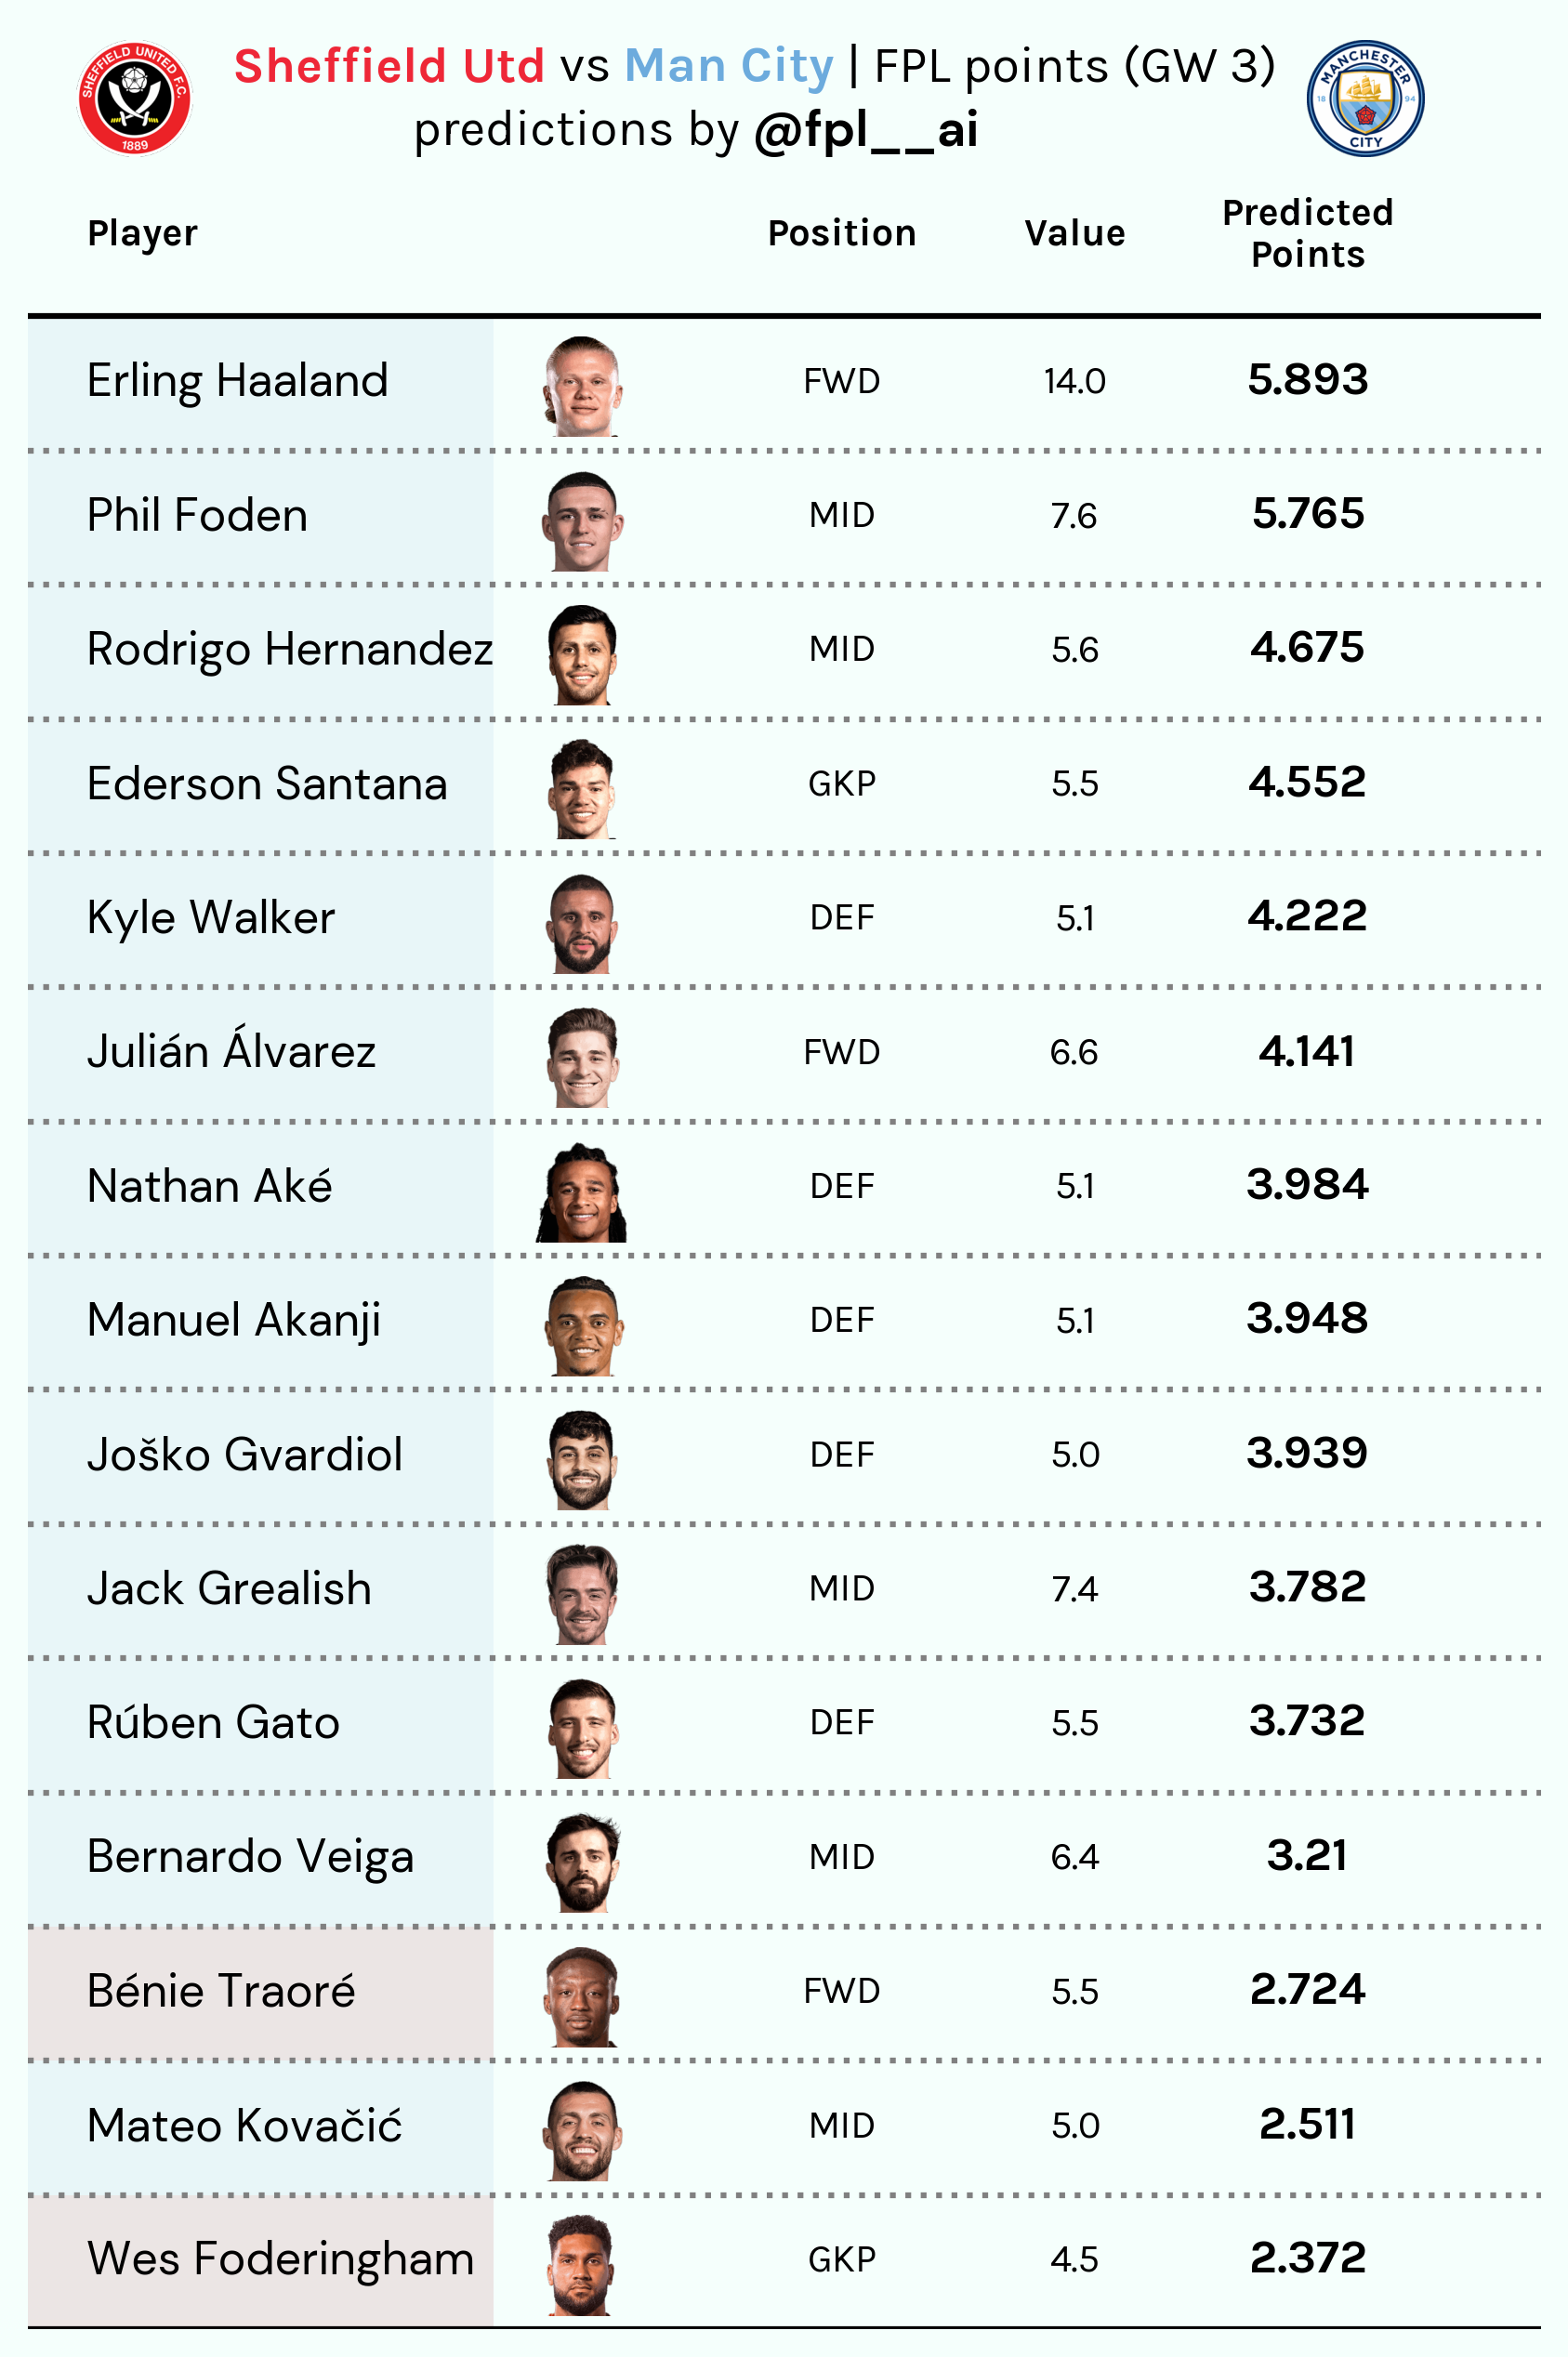

In [ ]:
ncols=df_club.shape[1]
nrows=df_club.shape[0]
color="#f5fffc"

fig = plt.figure(figsize=(7,10), dpi=300,facecolor = color)
ax = plt.subplot(facecolor =color)

ax.set_xlim(0, ncols+1.5)
ax.set_ylim(0, nrows+1)

positions=[0.25,3.5,4.5,5.5,6.5]
columns=df_club.columns

for i in range(nrows):
    for j,col in enumerate(columns):
      if j!=4:
        if j==0:
          ha="left"
          ax.annotate(
                    xy=(positions[j], i+0.5),
                    text=clean_name(df_club[col].iloc[i]),
                    ha=ha,
                    va='center',fontsize=12,fontfamily = "DM Sans",
                )
        elif j==3:
          ha = "center"
          ax.annotate(
                    xy=(positions[j], i+0.5),
                    text=df_club[col].iloc[i],
                    ha=ha,
                    va='center',weight="bold",fontsize=12
                )
        else:
          ha = "center"
          ax.annotate(
                    xy=(positions[j], i+0.5),
                    text=df_club[col].iloc[i],
                    ha=ha,
                    va='center'
                )

for i,team in enumerate(df_club["team"]):
  ax.fill_between(x=[0,2],y1=i+1,y2=i,color=club_colors[team],alpha=0.5,ec='None')







cols=["Player","Position","Value","Predicted\nPoints"]
for j, col in enumerate(cols):
    ha="center"
    if j==0:
        ha="left"
    ax.annotate(
            xy=(positions[j], nrows+0.6),
                text=f"{col}",
                ha=ha,
                va='center', weight="bold" )

ax.set_axis_off()

# Add dividing lines
ax.plot([ax.get_xlim()[0], ax.get_xlim()[1]], [nrows, nrows], lw=1.5, color='black', marker='', zorder=4)
ax.plot([ax.get_xlim()[0], ax.get_xlim()[1]], [0, 0], lw=1.5, color='black', marker='', zorder=4)
for i in range(1,nrows):
    ax.plot([ax.get_xlim()[0], ax.get_xlim()[1]], [i, i], lw=1.5, marker='', zorder=4,color='gray', ls=':')

# -- Transformation functions
DC_to_FC = ax.transData.transform
FC_to_NFC = fig.transFigure.inverted().transform
# -- Take data coordinates and transform them to normalized figure coordinates
DC_to_NFC = lambda x: FC_to_NFC(DC_to_FC(x))
# -- Add nation axes
ax_point_1 = DC_to_NFC([2.25, 0.5])
ax_point_2 = DC_to_NFC([3, 1.25])
ax_width = abs(ax_point_1[0] - ax_point_2[0])
ax_height = abs(ax_point_1[1] - ax_point_2[1])
for x in range(0, nrows):
    ax_coords = DC_to_NFC([2, x + .1])
    flag_ax = fig.add_axes(
        [ax_coords[0], ax_coords[1], ax_width, ax_height]
    )
    #print(df_club["name"])
    name=df_club["name"].iloc[x]
    try:
      player_url=f"https://images.fotmob.com/image_resources/playerimages/{player_images[name]}"
      ax_player(player_url, flag_ax)
    except HTTPError:
      ax_player("https://www.fotmob.com/_next/static/media/player_fallback.9cac7bea.png", flag_ax)


#header and logo
fig_text(
    x = 0.23, y = 0.93,
    s = f"<{clubs[0]}> vs <{clubs[1]}> | FPL points (GW {gameweek})\n               predictions by <@fpl__ai>",
    color = "black",
    size = 13,
    highlight_textprops = [
        {"weight":"bold","color":f"{club_texts[clubs[0]]}"},
        {"weight":"bold","color":f"{club_texts[clubs[1]]}"},
        {"weight":"bold","family": "DM Sans",},
    ],
    annotationbbox_kw={"xycoords": "figure fraction"}
)


#Get and Open the club logo
club_logo1 = Image.open(urllib.request.urlopen(club_logos[clubs[0]]))
#create new axes at top right corner [left_position,bottom_position,width,hight]
logo_ax = fig.add_axes([0.15, 0.88, 0.06, 0.06])
#paste logo on the axes
logo_ax.imshow(club_logo1)
#switch off  the axis off our AXES
logo_ax.axis("off")

#Get and Open the club logo
club_logo2 = Image.open(urllib.request.urlopen(club_logos[clubs[1]]))
#create new axes at top right corner [left_position,bottom_position,width,hight]
logo_ax = fig.add_axes([0.78, 0.88, 0.06, 0.06])
#paste logo on the axes
logo_ax.imshow(club_logo2)
#switch off  the axis off our AXES
logo_ax.axis("off")

## Match 10

In [ ]:
clubs=["Newcastle","Liverpool"]
df_club=df[df["team"].isin(clubs)].sort_values("points").reset_index()[["name","position","value","points","team"]].tail(15)

In [ ]:
df_club

name position  value  points       team
15           Anthony Gordon      MID    5.5   2.653  Newcastle
16         Andrew Robertson      DEF    6.5   2.798  Liverpool
17                Nick Pope      GKP    5.5   3.049  Newcastle
18               Cody Gakpo      FWD    7.5   3.104  Liverpool
19          Virgil van Dijk      DEF    6.0   3.115  Liverpool
20          Kieran Trippier      DEF    6.5   3.142  Newcastle
21       Dominik Szoboszlai      MID    7.0   3.225  Liverpool
22    Miguel Almirón Rejala      MID    6.4   3.499  Newcastle
23            Callum Wilson      FWD    7.9   3.522  Newcastle
24            Harvey Barnes      MID    6.5   3.912  Newcastle
25           Alexander Isak      FWD    7.7   4.113  Newcastle
26  Diogo Teixeira da Silva      MID    8.0   4.473  Liverpool
27                Luis Díaz      MID    7.7   4.595  Liverpool
28   Trent Alexander-Arnold      DEF    8.0   4.805  Liverpool
29            Mohamed Salah      MID   12.5   8.285  Liverpool

(-0.5, 191.5, 191.5, -0.5)

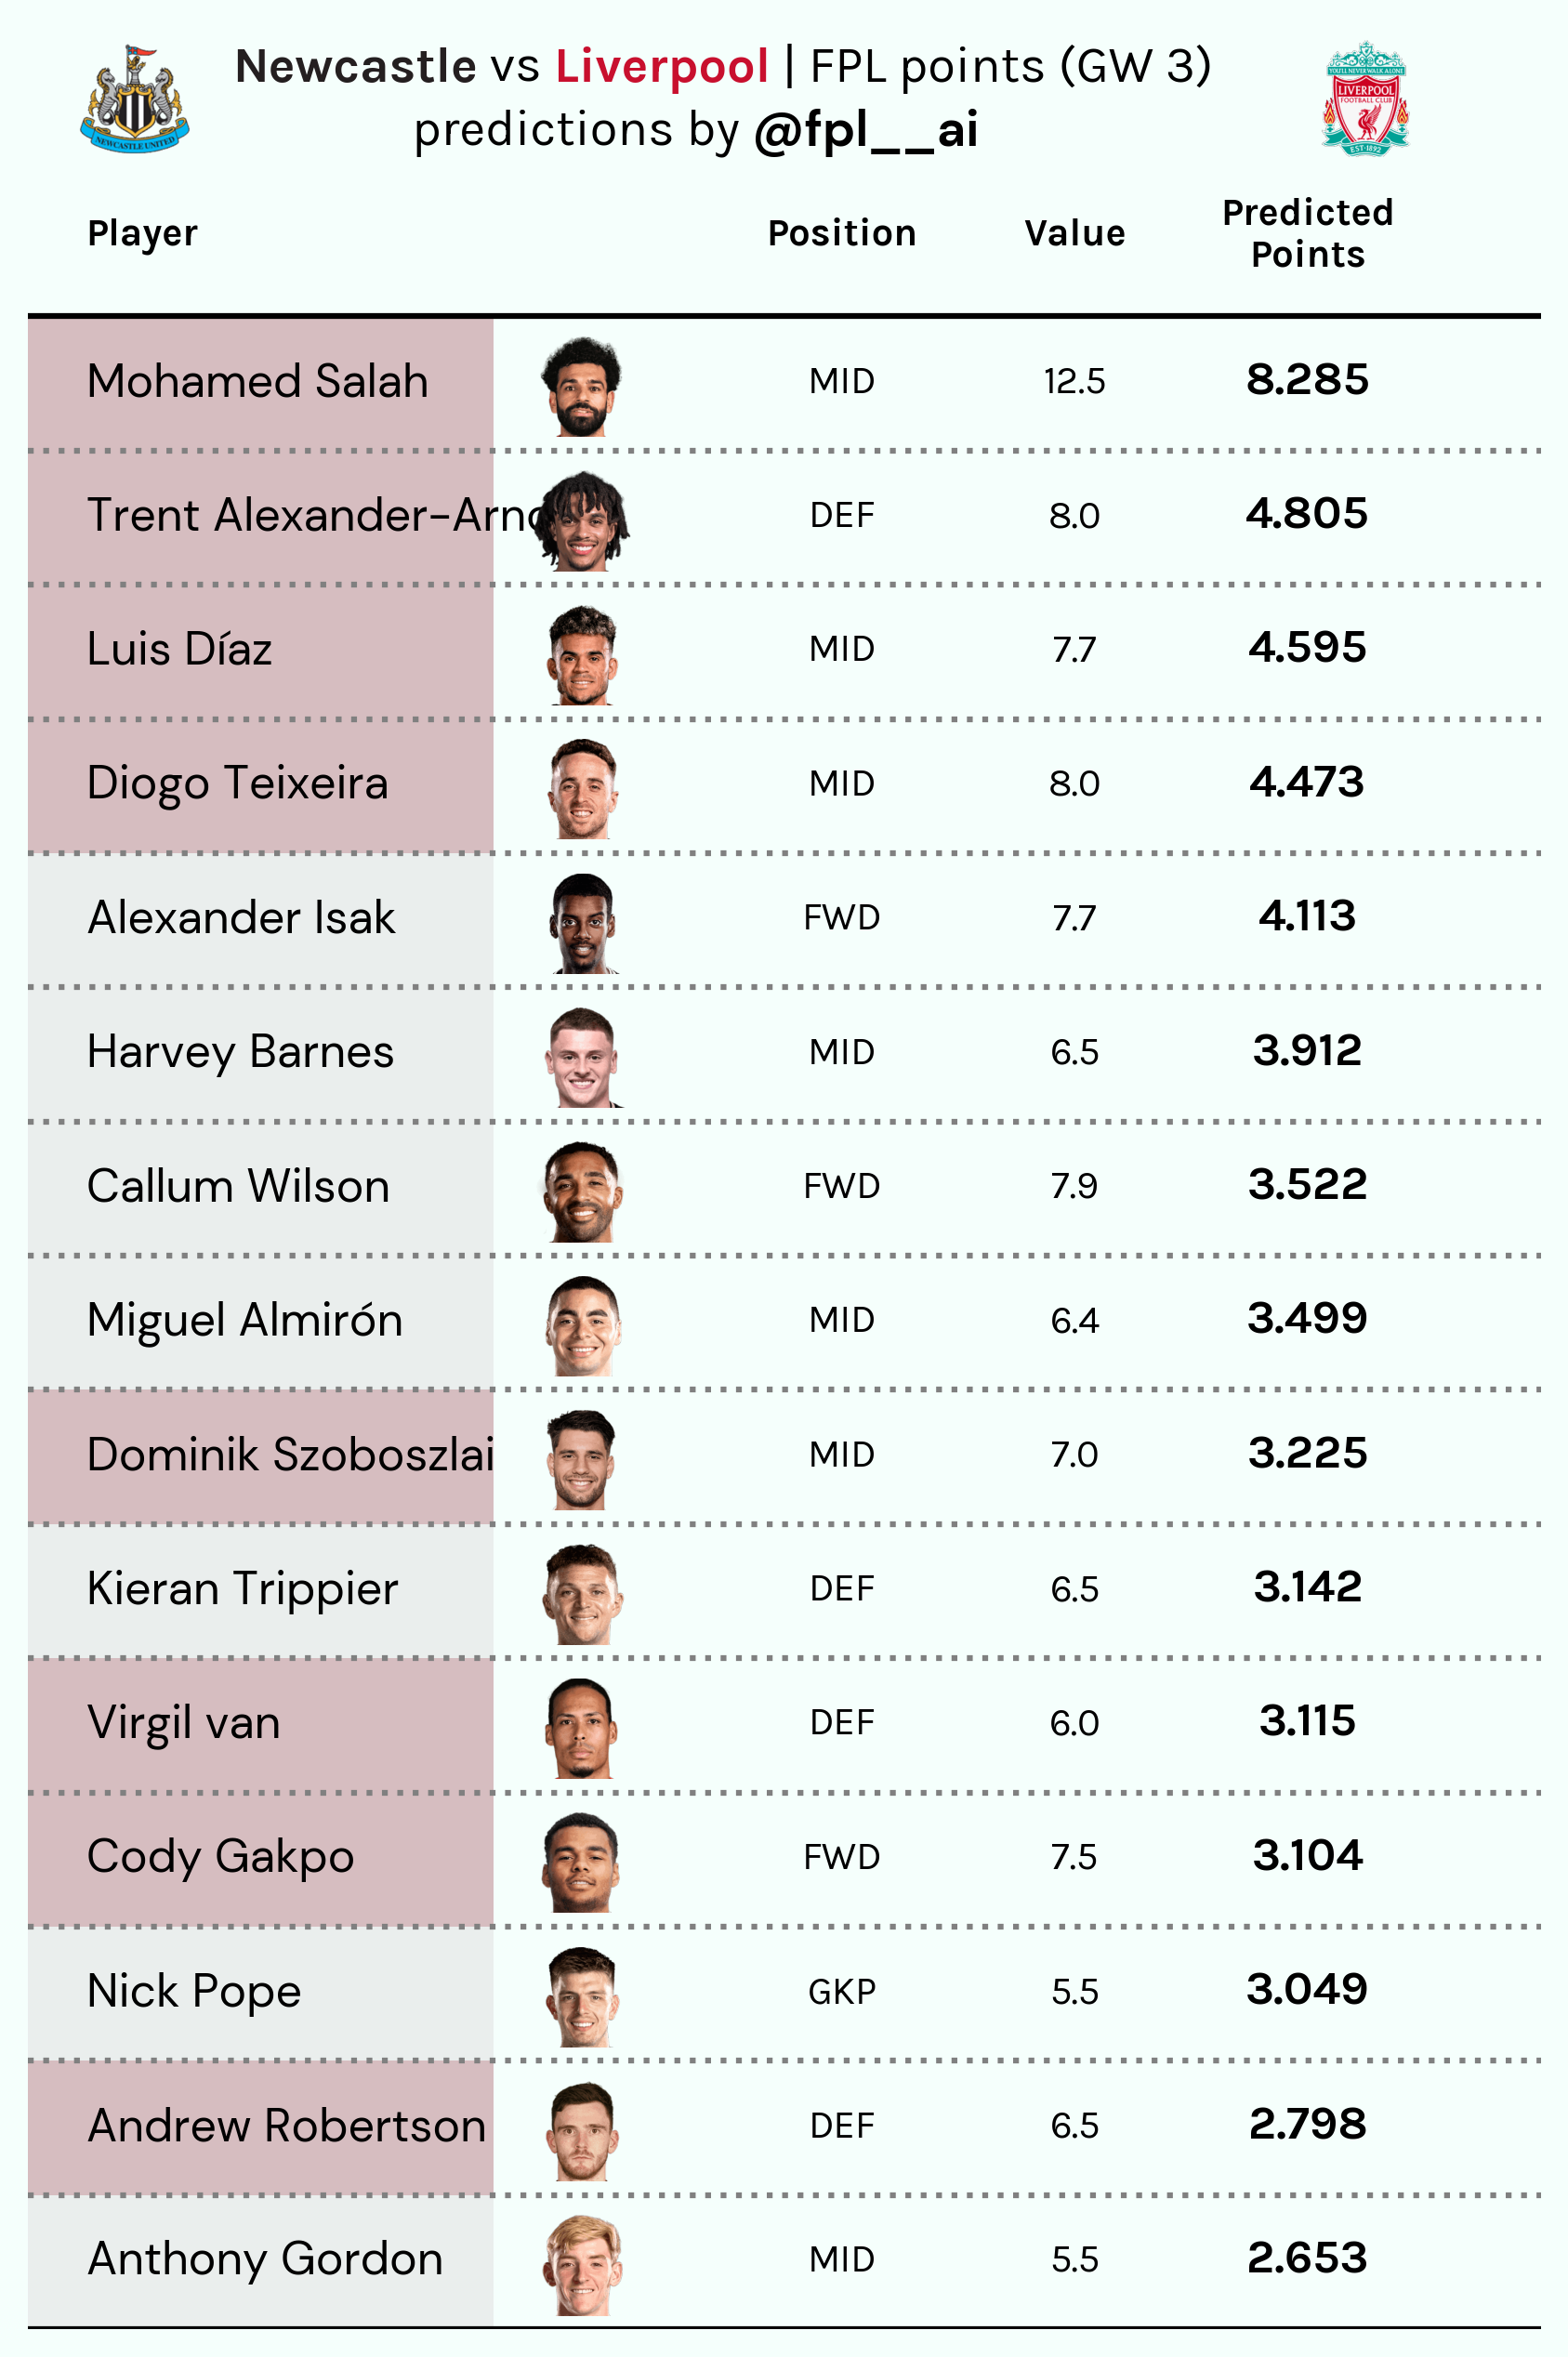

In [ ]:
ncols=df_club.shape[1]
nrows=df_club.shape[0]
color="#f5fffc"

fig = plt.figure(figsize=(7,10), dpi=300,facecolor = color)
ax = plt.subplot(facecolor =color)

ax.set_xlim(0, ncols+1.5)
ax.set_ylim(0, nrows+1)

positions=[0.25,3.5,4.5,5.5,6.5]
columns=df_club.columns

for i in range(nrows):
    for j,col in enumerate(columns):
      if j!=4:
        if j==0:
          ha="left"
          ax.annotate(
                    xy=(positions[j], i+0.5),
                    text=clean_name(df_club[col].iloc[i]),
                    ha=ha,
                    va='center',fontsize=12,fontfamily = "DM Sans",
                )
        elif j==3:
          ha = "center"
          ax.annotate(
                    xy=(positions[j], i+0.5),
                    text=df_club[col].iloc[i],
                    ha=ha,
                    va='center',weight="bold",fontsize=12
                )
        else:
          ha = "center"
          ax.annotate(
                    xy=(positions[j], i+0.5),
                    text=df_club[col].iloc[i],
                    ha=ha,
                    va='center'
                )

for i,team in enumerate(df_club["team"]):
  ax.fill_between(x=[0,2],y1=i+1,y2=i,color=club_colors[team],alpha=0.5,ec='None')







cols=["Player","Position","Value","Predicted\nPoints"]
for j, col in enumerate(cols):
    ha="center"
    if j==0:
        ha="left"
    ax.annotate(
            xy=(positions[j], nrows+0.6),
                text=f"{col}",
                ha=ha,
                va='center', weight="bold" )

ax.set_axis_off()

# Add dividing lines
ax.plot([ax.get_xlim()[0], ax.get_xlim()[1]], [nrows, nrows], lw=1.5, color='black', marker='', zorder=4)
ax.plot([ax.get_xlim()[0], ax.get_xlim()[1]], [0, 0], lw=1.5, color='black', marker='', zorder=4)
for i in range(1,nrows):
    ax.plot([ax.get_xlim()[0], ax.get_xlim()[1]], [i, i], lw=1.5, marker='', zorder=4,color='gray', ls=':')

# -- Transformation functions
DC_to_FC = ax.transData.transform
FC_to_NFC = fig.transFigure.inverted().transform
# -- Take data coordinates and transform them to normalized figure coordinates
DC_to_NFC = lambda x: FC_to_NFC(DC_to_FC(x))
# -- Add nation axes
ax_point_1 = DC_to_NFC([2.25, 0.5])
ax_point_2 = DC_to_NFC([3, 1.25])
ax_width = abs(ax_point_1[0] - ax_point_2[0])
ax_height = abs(ax_point_1[1] - ax_point_2[1])
for x in range(0, nrows):
    ax_coords = DC_to_NFC([2, x + .1])
    flag_ax = fig.add_axes(
        [ax_coords[0], ax_coords[1], ax_width, ax_height]
    )
    #print(df_club["name"])
    name=df_club["name"].iloc[x]
    try:
      player_url=f"https://images.fotmob.com/image_resources/playerimages/{player_images[name]}"
      ax_player(player_url, flag_ax)
    except HTTPError:
      ax_player("https://www.fotmob.com/_next/static/media/player_fallback.9cac7bea.png", flag_ax)


#header and logo
fig_text(
    x = 0.23, y = 0.93,
    s = f"<{clubs[0]}> vs <{clubs[1]}> | FPL points (GW {gameweek})\n               predictions by <@fpl__ai>",
    color = "black",
    size = 13,
    highlight_textprops = [
        {"weight":"bold","color":f"{club_texts[clubs[0]]}"},
        {"weight":"bold","color":f"{club_texts[clubs[1]]}"},
        {"weight":"bold","family": "DM Sans",},
    ],
    annotationbbox_kw={"xycoords": "figure fraction"}
)


#Get and Open the club logo
club_logo1 = Image.open(urllib.request.urlopen(club_logos[clubs[0]]))
#create new axes at top right corner [left_position,bottom_position,width,hight]
logo_ax = fig.add_axes([0.15, 0.88, 0.06, 0.06])
#paste logo on the axes
logo_ax.imshow(club_logo1)
#switch off  the axis off our AXES
logo_ax.axis("off")

#Get and Open the club logo
club_logo2 = Image.open(urllib.request.urlopen(club_logos[clubs[1]]))
#create new axes at top right corner [left_position,bottom_position,width,hight]
logo_ax = fig.add_axes([0.78, 0.88, 0.06, 0.06])
#paste logo on the axes
logo_ax.imshow(club_logo2)
#switch off  the axis off our AXES
logo_ax.axis("off")